## Title: Judging a Book by Its Cover (Genre Classification and Image Captioning)
UNI: pc3019 <br>
By: Preethi Chandirasekeran

### Introduction

It is often said that one should not judge a book by its cover. However, most readers analyze the cover while forming an opinion on a book. This project leverages book cover images to achieve two main goals. The first is to build deep learning models for book genre classification. The second is to build an image captioning model for book covers. These models can be used to provide more insight to prospective readers and help them choose books that they would enjoy reading. These models can also be used by authors who find the genre of their book ambiguous and want to determine the genre of their book to ensure that it reaches the appropriate audience. Furthermore, understanding how to describe book genres from book covers can be used to improve book recommender systems. This project uses a dataset constructed from web scraping the social cataloging website Goodreads.com which contains a vast collection of digitized book covers, book reviews, ratings, quotes, and more. 

### Key Objectives
- Creating a dataset of book cover images and the genres of the corresponding books
- Building, comparing, and evaluating the performance of various deep learning models for genre classification using book cover images. Aim to achieve 40-50% accuracy on the genre classification
- Using multimodal data to perform image captioning of the book covers. Since book covers are often highly stylized, this project aims to implement an image captioning model which can identify the basic content of the book covers

### Link to Presentation Video

https://youtu.be/VaFsqBOc19U

In [182]:
# Importing the modules
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import re
import requests
import html5lib
import copy
import urllib
import time
import numpy as np
from http.cookiejar import CookieJar
import random
from selenium import webdriver
import csv
import matplotlib.pyplot as plt
from torchvision.models import resnet18, resnet50, vgg16, alexnet
from selenium.webdriver.common.by import By
from torch import optim
from torch import nn
import imghdr
import pickle
import os



### Data Collection: Web Scraping

In [67]:
# Specifying the chrome driver path

chrome_driver_path = 'C:/Users/preet/Desktop/Columbia University College Assignments/Semester 1/Deep Learning for Computer Vision/Final Project/chromedriver/chromedriver'

In [68]:
webd = webdriver.Chrome(executable_path=chrome_driver_path)

C:\Users\preet\AppData\Local\Temp\ipykernel_25076\3416966156.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  webd = webdriver.Chrome(executable_path=chrome_driver_path)


In [69]:
# Using Selenium for user login on Goodreads.com so that we may access all of the digitized books
# Visitors who are not logged in can only view 50 books from each genre
username="myusername"
pword="mypassword"

In [70]:
webd.get("https://www.goodreads.com/ap/signin?language=en_US&openid.assoc_handle=amzn_goodreads_web_na&openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&openid.mode=checkid_setup&openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0&openid.pape.max_auth_age=0&openid.return_to=https%3A%2F%2Fwww.goodreads.com%2Fap-handler%2Fsign-in&siteState=4420712334253906bebd22009cc55de4")

In [71]:
webd.find_element(By.ID,"ap_email").send_keys(username)
webd.find_element(By.ID,"ap_password").send_keys(pword)

In [72]:
webd.find_element(By.ID,"signInSubmit").click()

In [15]:
# Web scraping the links of the book pages classified under the genre 'Romance'
romanceBookLinks=[]
for page_num in range(50):
    site = "https://www.goodreads.com/shelf/show/romance?page="+str(page_num)
    webd.get(site)
    books = webd.find_elements(By.CLASS_NAME,"bookTitle")

    for curr_book in books:
        href_val = curr_book.get_attribute('href')
        full_book_link = href_val
        romanceBookLinks.append(full_book_link)


In [16]:
# Displaying the web scraped links of the romance book pages
romanceBookLinks

['https://www.goodreads.com/book/show/1885.Pride_and_Prejudice',
 'https://www.goodreads.com/book/show/56732449-the-love-hypothesis',
 'https://www.goodreads.com/book/show/41150487-red-white-royal-blue',
 'https://www.goodreads.com/book/show/11870085-the-fault-in-our-stars',
 'https://www.goodreads.com/book/show/41865.Twilight',
 'https://www.goodreads.com/book/show/27213238-the-hating-game',
 'https://www.goodreads.com/book/show/52867387-beach-read',
 'https://www.goodreads.com/book/show/36199084-the-kiss-quotient',
 'https://www.goodreads.com/book/show/27362503-it-ends-with-us',
 'https://www.goodreads.com/book/show/42201431-the-unhoneymooners',
 'https://www.goodreads.com/book/show/54985743-people-we-meet-on-vacation',
 'https://www.goodreads.com/book/show/10818853-fifty-shades-of-grey',
 'https://www.goodreads.com/book/show/17347634-me-before-you',
 'https://www.goodreads.com/book/show/49041.New_Moon',
 'https://www.goodreads.com/book/show/15745753-eleanor-park',
 'https://www.good

In [76]:
# Web scraping the links of the book pages classified under the genre 'Memoir'
memoirBookLinks=[]
for page_num in range(50):
    site = "https://www.goodreads.com/shelf/show/memoir?page="+str(page_num)
    webd.get(site)
    books = webd.find_elements(By.CLASS_NAME,"bookTitle")

    for curr_book in books:
        href_val = curr_book.get_attribute('href')
        full_book_link = href_val
        memoirBookLinks.append(full_book_link)

In [19]:
# Web scraping the links of the book pages classified under the genre 'Horror'
horrorBookLinks=[]
for page_num in range(50):
    site = "https://www.goodreads.com/shelf/show/horror?page="+str(page_num)
    webd.get(site)
    books = webd.find_elements(By.CLASS_NAME,"bookTitle")

    for curr_book in books:
        href_val = curr_book.get_attribute('href')
        full_book_link =href_val
        horrorBookLinks.append(full_book_link)

In [20]:
# Web scraping the links of the book pages classified under the genre 'Fantasy'
fantasyBookLinks=[]
for page_num in range(50):
    site = "https://www.goodreads.com/shelf/show/fantasy?page="+str(page_num)
    webd.get(site)
    books = webd.find_elements(By.CLASS_NAME,"bookTitle")

    for curr_book in books:
        href_val = curr_book.get_attribute('href')
        full_book_link = href_val
        fantasyBookLinks.append(full_book_link)

In [21]:
# Web scraping the links of the book pages classified under the genre 'Self-Help'
selfHelpBookLinks=[]
for page_num in range(50):
    site = "https://www.goodreads.com/shelf/show/self-help?page="+str(page_num)
    webd.get(site)
    books = webd.find_elements(By.CLASS_NAME,"bookTitle")

    for curr_book in books:
        href_val = curr_book.get_attribute('href')
        full_book_link = href_val
        selfHelpBookLinks.append(full_book_link)

In [22]:
# Web scraping the links of the book pages classified under the genre 'Science Fiction'
sciFiBookLinks=[]
for page_num in range(50):
    site = "https://www.goodreads.com/shelf/show/science-fiction?page="+str(page_num)
    webd.get(site)
    books = webd.find_elements(By.CLASS_NAME,"bookTitle")

    for curr_book in books:
        href_val = curr_book.get_attribute('href')
        full_book_link = href_val
        sciFiBookLinks.append(full_book_link)

In [23]:
# We write these links to separate .csv files
fields=['Url']
rows=[]
for i in range(len(romanceBookLinks)):
    new_row=[romanceBookLinks[i]]
    rows.append(new_row)

filename = "RomanceBookUrls.csv"
with open(filename, 'w', newline='') as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)

In [79]:
fields=['Url']
rows=[]
for i in range(len(memoirBookLinks)):
    new_row=[memoirBookLinks[i]]
    rows.append(new_row)

filename = "MemoirBookUrls.csv"
with open(filename, 'w', newline='') as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)

In [25]:
fields=['Url']
rows=[]
for i in range(len(horrorBookLinks)):
    new_row=[horrorBookLinks[i]]
    rows.append(new_row)

filename = "HorrorBookUrls.csv"
with open(filename, 'w', newline='') as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)

In [26]:
fields=['Url']
rows=[]
for i in range(len(fantasyBookLinks)):
    new_row=[fantasyBookLinks[i]]
    rows.append(new_row)

filename = "FantasyBookUrls.csv"
with open(filename, 'w', newline='') as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)

In [27]:
fields=['Url']
rows=[]
for i in range(len(selfHelpBookLinks)):
    new_row=[selfHelpBookLinks[i]]
    rows.append(new_row)

filename = "SelfHelpBookUrls.csv"
with open(filename, 'w', newline='') as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)

In [28]:
fields=['Url']
rows=[]
for i in range(len(sciFiBookLinks)):
    new_row=[sciFiBookLinks[i]]
    rows.append(new_row)

filename = "SciFiHelpBookUrls.csv"
with open(filename, 'w', newline='') as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)

In [ ]:
# Defining functions to download the book cover images from each book's webpage

In [4]:
import os

In [41]:
# Defining function that accepts the books webpage and webdriver as inputs
# Returns the books title and url of the book cover image
def fetch_image_url_and_text(query,  wd, sleep_between_interactions=1):
    wd.get(query)
    try:
        checkquote = wd.find_element(By.ID,"quoteAuthor")
        myflag=True
    except:
        myflag=False
    while myflag==True:
        wd.get(query)
        try:
            checkquote = wd.find_element(By.ID,"quoteAuthor")
            myflag=True
        except:
            myflag=False
    my_title = None
    my_url = None
    actual_image = wd.find_element(By.CLASS_NAME,"ResponsiveImage")
    my_url = actual_image.get_attribute('src')
    actual_title = wd.find_element(By.CLASS_NAME,"Text__title1")
    my_title = actual_title.text
    return my_title, my_url


In [31]:
# Defining function that accepts the image url and file path as input and saves the image
def image_download_util(url, fPath):
    try:
        img_content = requests.get(url).content

    except Exception as e:
        print(f"Error in downloading the image")

    try:
        my_path= os.path.join(fPath, "romance"+str(romanceCounter) + ".jpg")
        myfile2 = open(my_path, 'wb')
        myfile2.write(img_content)
        myfile2.close()
        print(f"The image was successfully saved at {fPath}")
    except Exception as e:
        print(f"Error in saving the image")

In [42]:
# Initializing counter for romance books
# This counter value is also used for generating the image name strings
romanceCounter=0

# Initializing dictionary for romance books where the key is the title 
# and the value is a list with 2 elements in the form of [book page url, image_namestr] where image_namestr is the file name
# of the corresponding book cover in the dataset
romanceBookDetails={}

In [43]:
def download_romance_util(url, driver_path, tgtPath='./Dataset/Romance'):
    global romanceCounter
    with webdriver.Chrome(executable_path=driver_path) as wd:
        res_title, res_url = fetch_image_url_and_text(url, wd=webd, sleep_between_interactions=0.5)

    if res_url is not None:
        image_download_util( res_url,tgtPath)
        image_namestr = "romance"+str(romanceCounter)
        if res_title not in romanceBookDetails.keys():
            print(res_title," is the title")
            # Populating the dictionary romanceBookDetails
            romanceBookDetails[res_title]=[res_url,image_namestr]
            romanceCounter+=1
        

In [44]:
import pandas as pd
romanceBookLinksDF = pd.read_csv('RomanceBookUrls.csv')

In [45]:
# Iterating through the urls of each romance book's webpage and downloading the book cover images
for idx in range(len(romanceBookLinksDF)):
    my_url = romanceBookLinksDF.loc[idx,"Url"]
    download_romance_util(my_url,chrome_driver_path)
    

C:\Users\preet\AppData\Local\Temp\ipykernel_25076\1734361625.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


The image was successfully saved at ./Dataset/Romance
Pride and Prejudice  is the title
The image was successfully saved at ./Dataset/Romance
The Love Hypothesis  is the title
The image was successfully saved at ./Dataset/Romance
Red, White & Royal Blue  is the title
The image was successfully saved at ./Dataset/Romance
The Fault in Our Stars  is the title
The image was successfully saved at ./Dataset/Romance
Twilight  is the title
The image was successfully saved at ./Dataset/Romance
The Hating Game  is the title
The image was successfully saved at ./Dataset/Romance
Beach Read  is the title
The image was successfully saved at ./Dataset/Romance
The Kiss Quotient  is the title
The image was successfully saved at ./Dataset/Romance
It Ends with Us  is the title
The image was successfully saved at ./Dataset/Romance
The Unhoneymooners  is the title
The image was successfully saved at ./Dataset/Romance
People We Meet on Vacation  is the title
The image was successfully saved at ./Dataset/Rom

The image was successfully saved at ./Dataset/Romance
Josh and Hazel's Guide to Not Dating  is the title
The image was successfully saved at ./Dataset/Romance
The Wedding Date  is the title
The image was successfully saved at ./Dataset/Romance
Heartstopper: Volume Two  is the title
The image was successfully saved at ./Dataset/Romance
Simon vs. the Homo Sapiens Agenda  is the title
The image was successfully saved at ./Dataset/Romance
Divergent  is the title
The image was successfully saved at ./Dataset/Romance
The Hunger Games  is the title
The image was successfully saved at ./Dataset/Romance
Romancing Mister Bridgerton  is the title
The image was successfully saved at ./Dataset/Romance
The Bromance Book Club  is the title
The image was successfully saved at ./Dataset/Romance
Maybe Someday  is the title
The image was successfully saved at ./Dataset/Romance
Aristotle and Dante Discover the Secrets of the Universe  is the title
The image was successfully saved at ./Dataset/Romance
Arch

The image was successfully saved at ./Dataset/Romance
Reflected in You  is the title
The image was successfully saved at ./Dataset/Romance
Voyager  is the title
The image was successfully saved at ./Dataset/Romance
The Ex Talk  is the title
The image was successfully saved at ./Dataset/Romance
A Court of Frost and Starlight  is the title
The image was successfully saved at ./Dataset/Romance
A Court of Silver Flames  is the title
The image was successfully saved at ./Dataset/Romance
Twisted Love  is the title
The image was successfully saved at ./Dataset/Romance
Can You Keep a Secret?  is the title
The image was successfully saved at ./Dataset/Romance
Vampire Academy  is the title
The image was successfully saved at ./Dataset/Romance
The Friend Zone  is the title
The image was successfully saved at ./Dataset/Romance
Insurgent  is the title
The image was successfully saved at ./Dataset/Romance
On the Way to the Wedding  is the title
The image was successfully saved at ./Dataset/Romance
B

The image was successfully saved at ./Dataset/Romance
When a Scot Ties the Knot  is the title
The image was successfully saved at ./Dataset/Romance
Losing It  is the title
The image was successfully saved at ./Dataset/Romance
My Favorite Half-Night Stand  is the title
The image was successfully saved at ./Dataset/Romance
Delilah Green Doesn't Care  is the title
The image was successfully saved at ./Dataset/Romance
Every Summer After  is the title
The image was successfully saved at ./Dataset/Romance
Scandal in Spring  is the title
The image was successfully saved at ./Dataset/Romance
Every Day  is the title
The image was successfully saved at ./Dataset/Romance
The Happy Ever After Playlist  is the title
The image was successfully saved at ./Dataset/Romance
The Sweetest Oblivion  is the title
The image was successfully saved at ./Dataset/Romance
Gabriel's Inferno  is the title
The image was successfully saved at ./Dataset/Romance
Lover Revealed  is the title
The image was successfully s

The image was successfully saved at ./Dataset/Romance
A Hunger Like No Other  is the title
The image was successfully saved at ./Dataset/Romance
Below Zero  is the title
The image was successfully saved at ./Dataset/Romance
The Raven Boys  is the title
The image was successfully saved at ./Dataset/Romance
Ruin and Rising  is the title
The image was successfully saved at ./Dataset/Romance
Love in the Afternoon  is the title
The image was successfully saved at ./Dataset/Romance
The Fiery Cross  is the title
The image was successfully saved at ./Dataset/Romance
Maybe in Another Life  is the title
The image was successfully saved at ./Dataset/Romance
The Wallflower Wager  is the title
The image was successfully saved at ./Dataset/Romance
The Road Trip  is the title
The image was successfully saved at ./Dataset/Romance
Seduce Me at Sunrise  is the title
The image was successfully saved at ./Dataset/Romance
Norwegian Wood  is the title
The image was successfully saved at ./Dataset/Romance
A 

The image was successfully saved at ./Dataset/Romance
This Lullaby  is the title
The image was successfully saved at ./Dataset/Romance
Instructions for Dancing  is the title
The image was successfully saved at ./Dataset/Romance
American Royals  is the title
The image was successfully saved at ./Dataset/Romance
Lover Mine  is the title
The image was successfully saved at ./Dataset/Romance
Alex, Approximately  is the title
The image was successfully saved at ./Dataset/Romance
Tools of Engagement  is the title
The image was successfully saved at ./Dataset/Romance
Broken Prince  is the title
The image was successfully saved at ./Dataset/Romance
Making Faces  is the title
The image was successfully saved at ./Dataset/Romance
Crossed  is the title
The image was successfully saved at ./Dataset/Romance
Grey  is the title
The image was successfully saved at ./Dataset/Romance
Never Too Far  is the title
The image was successfully saved at ./Dataset/Romance
Window Shopping  is the title
The image

The image was successfully saved at ./Dataset/Romance
Bossman  is the title
The image was successfully saved at ./Dataset/Romance
The Hook Up  is the title
The image was successfully saved at ./Dataset/Romance
Emergency Contact  is the title
The image was successfully saved at ./Dataset/Romance
Ella Enchanted  is the title
The image was successfully saved at ./Dataset/Romance
Warm Bodies  is the title
The image was successfully saved at ./Dataset/Romance
Wicked and the Wallflower  is the title
The image was successfully saved at ./Dataset/Romance
Never Seduce a Scot  is the title
The image was successfully saved at ./Dataset/Romance
Lover Unleashed  is the title
The image was successfully saved at ./Dataset/Romance
One Foot in the Grave  is the title
The image was successfully saved at ./Dataset/Romance
Howl’s Moving Castle  is the title
The image was successfully saved at ./Dataset/Romance
Captivated by You  is the title
The image was successfully saved at ./Dataset/Romance
By Your Si

The image was successfully saved at ./Dataset/Romance
Moon Called  is the title
The image was successfully saved at ./Dataset/Romance
The Bookshop on the Corner  is the title
The image was successfully saved at ./Dataset/Romance
An Extraordinary Union  is the title
The image was successfully saved at ./Dataset/Romance
Blue-Eyed Devil  is the title
The image was successfully saved at ./Dataset/Romance
Rush  is the title
The image was successfully saved at ./Dataset/Romance
Beautiful Oblivion  is the title
The image was successfully saved at ./Dataset/Romance
Mr. Wrong Number  is the title
The image was successfully saved at ./Dataset/Romance
In Bed with a Highlander  is the title
The image was successfully saved at ./Dataset/Romance
Always Only You  is the title
The image was successfully saved at ./Dataset/Romance
Lover Reborn  is the title
The image was successfully saved at ./Dataset/Romance
Hani and Ishu's Guide to Fake Dating  is the title
The image was successfully saved at ./Data

The image was successfully saved at ./Dataset/Romance
While We Were Dating  is the title
The image was successfully saved at ./Dataset/Romance
No Rest for the Wicked  is the title
The image was successfully saved at ./Dataset/Romance
Whitney, My Love  is the title
The image was successfully saved at ./Dataset/Romance
Lover at Last  is the title
The image was successfully saved at ./Dataset/Romance
Requiem  is the title
The image was successfully saved at ./Dataset/Romance
Felix Ever After  is the title
The image was successfully saved at ./Dataset/Romance
The Iron Duke  is the title
The image was successfully saved at ./Dataset/Romance
Key of Valor  is the title
The image was successfully saved at ./Dataset/Romance
Lore Olympus: Volume One  is the title
The image was successfully saved at ./Dataset/Romance
On the Fence  is the title
The image was successfully saved at ./Dataset/Romance
Forever Too Far  is the title
The image was successfully saved at ./Dataset/Romance
Good Girl Complex

The image was successfully saved at ./Dataset/Romance
The Siren  is the title
The image was successfully saved at ./Dataset/Romance
A Scot in the Dark  is the title
The image was successfully saved at ./Dataset/Romance
Turtles All the Way Down  is the title
The image was successfully saved at ./Dataset/Romance
To Tame a Highland Warrior  is the title
The image was successfully saved at ./Dataset/Romance
Malibu Rising  is the title
The image was successfully saved at ./Dataset/Romance
Love From A to Z  is the title
The image was successfully saved at ./Dataset/Romance
One with You  is the title
The image was successfully saved at ./Dataset/Romance
Alone With You in the Ether  is the title
The image was successfully saved at ./Dataset/Romance
Legendary  is the title
The image was successfully saved at ./Dataset/Romance
Champion  is the title
The image was successfully saved at ./Dataset/Romance
Angels Fall  is the title
The image was successfully saved at ./Dataset/Romance
Wicked Deeds o

The image was successfully saved at ./Dataset/Romance
Bitten  is the title
The image was successfully saved at ./Dataset/Romance
Love Story  is the title
The image was successfully saved at ./Dataset/Romance
The Falling in Love Montage  is the title
The image was successfully saved at ./Dataset/Romance
The Perfect Play  is the title
The image was successfully saved at ./Dataset/Romance
You Made a Fool of Death with Your Beauty  is the title
The image was successfully saved at ./Dataset/Romance
Battle Royal  is the title
The image was successfully saved at ./Dataset/Romance
Slightly Dangerous  is the title
The image was successfully saved at ./Dataset/Romance
The Winner's Kiss  is the title
The image was successfully saved at ./Dataset/Romance
Addicted for Now  is the title
The image was successfully saved at ./Dataset/Romance
The Day of the Duchess  is the title
The image was successfully saved at ./Dataset/Romance
Nick and Charlie  is the title
The image was successfully saved at ./Da

The image was successfully saved at ./Dataset/Romance
By a Thread  is the title
The image was successfully saved at ./Dataset/Romance
Rusty Nailed  is the title
The image was successfully saved at ./Dataset/Romance
Let's Talk About Love  is the title
The image was successfully saved at ./Dataset/Romance
Too Late  is the title
The image was successfully saved at ./Dataset/Romance
It Ain't Me, Babe  is the title
The image was successfully saved at ./Dataset/Romance
Night Play  is the title
The image was successfully saved at ./Dataset/Romance
Count Your Lucky Stars  is the title
The image was successfully saved at ./Dataset/Romance
Words in Deep Blue  is the title
The image was successfully saved at ./Dataset/Romance
Everything Leads to You  is the title
The image was successfully saved at ./Dataset/Romance
Rival  is the title
The image was successfully saved at ./Dataset/Romance
The Unwanted Wife  is the title
The image was successfully saved at ./Dataset/Romance
Uglies  is the title
Th

The image was successfully saved at ./Dataset/Romance
The Raven King  is the title
The image was successfully saved at ./Dataset/Romance
Good Boy  is the title
The image was successfully saved at ./Dataset/Romance
World After  is the title
The image was successfully saved at ./Dataset/Romance
The Secret History of the Pink Carnation  is the title
The image was successfully saved at ./Dataset/Romance
The Proposition  is the title
The image was successfully saved at ./Dataset/Romance
The Fastest Way to Fall  is the title
The image was successfully saved at ./Dataset/Romance
Slippery Creatures  is the title
The image was successfully saved at ./Dataset/Romance
The Soldier's Scoundrel  is the title
The image was successfully saved at ./Dataset/Romance
Blood Bound  is the title
The image was successfully saved at ./Dataset/Romance
The Sisterhood of the Traveling Pants  is the title
The image was successfully saved at ./Dataset/Romance
Black Hills  is the title
The image was successfully sav

The image was successfully saved at ./Dataset/Romance
The Iron Queen  is the title
The image was successfully saved at ./Dataset/Romance
Hunting Ground  is the title
The image was successfully saved at ./Dataset/Romance
Immortal in Death  is the title
The image was successfully saved at ./Dataset/Romance
Succubus Blues  is the title
The image was successfully saved at ./Dataset/Romance
Wild at Heart  is the title
The image was successfully saved at ./Dataset/Romance
The Will  is the title
The image was successfully saved at ./Dataset/Romance
Driven  is the title
The image was successfully saved at ./Dataset/Romance
Happily Ever After  is the title
The image was successfully saved at ./Dataset/Romance
The image was successfully saved at ./Dataset/Romance
A Cuban Girl's Guide to Tea and Tomorrow  is the title
The image was successfully saved at ./Dataset/Romance
Never Never: Part Two  is the title
The image was successfully saved at ./Dataset/Romance
Trade Me  is the title
The image was 

In [80]:
# Similarly we download the book cover images for the remaining genres (Memoir, Horror, Fantasy, Self-Help, and SciFi)
memoirBookLinksDF = pd.read_csv('MemoirBookUrls.csv')

In [81]:
memoirCounter=0
memoirBookDetails={}

In [82]:
def image_download_util_memoir(url, fPath ):
    try:
        img_content = requests.get(url).content

    except Exception as e:
        print(f"Error in downloading the image")

    try:
        my_path= os.path.join(fPath, "memoir"+str(memoirCounter) + ".jpg")
        myfile2 = open(my_path, 'wb')
        myfile2.write(img_content)
        myfile2.close()
        print(f"The image was successfully saved at {fPath}")
    except Exception as e:
        print(f"Error in saving the image")

In [83]:
def download_memoir_util(url, driver_path, tgtPath='./Dataset/Memoir'):
    global memoirCounter
    with webdriver.Chrome(executable_path=driver_path) as wd:
        res_title, res_url = fetch_image_url_and_text(url, wd=webd, sleep_between_interactions=0.5)

    if res_url is not None:
        
        image_download_util_memoir( res_url, tgtPath)
        image_namestr = "memoir"+str(memoirCounter)
        if res_title not in memoirBookDetails.keys():
            print(res_title," is the title")
            memoirBookDetails[res_title]=[res_url,image_namestr]
            memoirCounter+=1

In [84]:
for idx in range(len(memoirBookLinksDF)):
    my_url = memoirBookLinksDF.loc[idx,"Url"]
    download_memoir_util(my_url,chrome_driver_path)

C:\Users\preet\AppData\Local\Temp\ipykernel_25076\2587037423.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


The image was successfully saved at ./Dataset/Memoir
Educated  is the title
The image was successfully saved at ./Dataset/Memoir
The Glass Castle  is the title
The image was successfully saved at ./Dataset/Memoir
Becoming  is the title
The image was successfully saved at ./Dataset/Memoir
Born a Crime: Stories From a South African Childhood  is the title
The image was successfully saved at ./Dataset/Memoir
Wild: From Lost to Found on the Pacific Crest Trail  is the title
The image was successfully saved at ./Dataset/Memoir
Bossypants  is the title
The image was successfully saved at ./Dataset/Memoir
When Breath Becomes Air  is the title
The image was successfully saved at ./Dataset/Memoir
The Diary of a Young Girl  is the title
The image was successfully saved at ./Dataset/Memoir
Night  is the title
The image was successfully saved at ./Dataset/Memoir
Yes Please  is the title
The image was successfully saved at ./Dataset/Memoir
Eat, Pray, Love  is the title
The image was successfully sa

The image was successfully saved at ./Dataset/Memoir
The Autobiography of Malcolm X  is the title
The image was successfully saved at ./Dataset/Memoir
Julie and Julia: 365 Days, 524 Recipes, 1 Tiny Apartment Kitchen  is the title
The image was successfully saved at ./Dataset/Memoir
As You Wish: Inconceivable Tales from the Making of The Princess Bride  is the title
The image was successfully saved at ./Dataset/Memoir
An Unquiet Mind: A Memoir of Moods and Madness  is the title
The image was successfully saved at ./Dataset/Memoir
The Argonauts  is the title
The image was successfully saved at ./Dataset/Memoir
I Am, I Am, I Am: Seventeen Brushes with Death  is the title
The image was successfully saved at ./Dataset/Memoir
All You Can Ever Know  is the title
The image was successfully saved at ./Dataset/Memoir
The Midwife: A Memoir of Birth, Joy, and Hard Times  is the title
The image was successfully saved at ./Dataset/Memoir
Good Talk: A Memoir in Conversations  is the title
The image w

The image was successfully saved at ./Dataset/Memoir
Blood, Bones, and Butter: The Inadvertent Education of a Reluctant Chef  is the title
The image was successfully saved at ./Dataset/Memoir
Holidays on Ice  is the title
The image was successfully saved at ./Dataset/Memoir
A House in the Sky  is the title
The image was successfully saved at ./Dataset/Memoir
Reasons to Stay Alive  is the title
The image was successfully saved at ./Dataset/Memoir
The Sun Does Shine: How I Found Life and Freedom on Death Row  is the title
The image was successfully saved at ./Dataset/Memoir
This Boy's Life  is the title
The image was successfully saved at ./Dataset/Memoir
Solutions and Other Problems  is the title
The image was successfully saved at ./Dataset/Memoir
84, Charing Cross Road  is the title
The image was successfully saved at ./Dataset/Memoir
Broken  is the title
The image was successfully saved at ./Dataset/Memoir
Mennonite in a Little Black Dress: A Memoir of Going Home  is the title
The im

The image was successfully saved at ./Dataset/Memoir
March: Book Two  is the title
The image was successfully saved at ./Dataset/Memoir
Out of Africa  is the title
The image was successfully saved at ./Dataset/Memoir
You'll Grow Out of It  is the title
The image was successfully saved at ./Dataset/Memoir
The Bright Hour: A Memoir of Living and Dying  is the title
The image was successfully saved at ./Dataset/Memoir
Boy: Tales of Childhood  is the title
The image was successfully saved at ./Dataset/Memoir
Boy Erased: A Memoir of Identity, Faith, and Family  is the title
The image was successfully saved at ./Dataset/Memoir
Dad Is Fat  is the title
The image was successfully saved at ./Dataset/Memoir
Operating Instructions: A Journal of My Son's First Year  is the title
The image was successfully saved at ./Dataset/Memoir
You Can't Touch My Hair: And Other Things I Still Have to Explain  is the title
The image was successfully saved at ./Dataset/Memoir
Blackout: Remembering the Things I D

The image was successfully saved at ./Dataset/Memoir
Girl in a Band  is the title
The image was successfully saved at ./Dataset/Memoir
In the Country We Love: My Family Divided  is the title
The image was successfully saved at ./Dataset/Memoir
Braiding Sweetgrass  is the title
The image was successfully saved at ./Dataset/Memoir
The Fire Never Goes Out: A Memoir in Pictures  is the title
The image was successfully saved at ./Dataset/Memoir
Nobody Will Tell You This But Me: A True (as Told to Me) Story  is the title
The image was successfully saved at ./Dataset/Memoir
Memoirs of a Geisha  is the title
The image was successfully saved at ./Dataset/Memoir
I Remember Nothing: and Other Reflections  is the title
The image was successfully saved at ./Dataset/Memoir
The Dirty Life: On Farming, Food, and Love  is the title
The image was successfully saved at ./Dataset/Memoir
The Know-It-All  is the title
The image was successfully saved at ./Dataset/Memoir
I'm a Stranger Here Myself: Notes on 

The image was successfully saved at ./Dataset/Memoir
Shadows of the Workhouse  is the title
The image was successfully saved at ./Dataset/Memoir
Notes from a Young Black Chef  is the title
The image was successfully saved at ./Dataset/Memoir
Hold Still: A Memoir with Photographs  is the title
The image was successfully saved at ./Dataset/Memoir
Desert Solitaire  is the title
The image was successfully saved at ./Dataset/Memoir
Dancing at the Pity Party: A Dead Mom Graphic Memoir  is the title
The image was successfully saved at ./Dataset/Memoir
Another Bullshit Night in Suck City  is the title
The image was successfully saved at ./Dataset/Memoir
This Is Just My Face: Try Not to Stare  is the title
The image was successfully saved at ./Dataset/Memoir
My Friend Dahmer  is the title
The image was successfully saved at ./Dataset/Memoir
Fresh Off the Boat  is the title
The image was successfully saved at ./Dataset/Memoir
Nickel and Dimed: On (Not) Getting by in America  is the title
The ima

The image was successfully saved at ./Dataset/Memoir
The Return: Fathers, Sons, and the Land in Between  is the title
The image was successfully saved at ./Dataset/Memoir
What Is the What  is the title
The image was successfully saved at ./Dataset/Memoir
I Am Nujood, Age 10 and Divorced  is the title
The image was successfully saved at ./Dataset/Memoir
Year of the Monkey  is the title
The image was successfully saved at ./Dataset/Memoir
Goodbye to All That  is the title
The image was successfully saved at ./Dataset/Memoir
Love, Loss, and What We Ate: A Memoir  is the title
The image was successfully saved at ./Dataset/Memoir
Such a Pretty Fat: One Narcissist's Quest to Discover If Her Life Makes Her Ass Look Big, or Why Pie Is Not the Answer  is the title
The image was successfully saved at ./Dataset/Memoir
Paris in Love  is the title
The image was successfully saved at ./Dataset/Memoir
I Am Not Myself These Days  is the title
The image was successfully saved at ./Dataset/Memoir
Go Ask

The image was successfully saved at ./Dataset/Memoir
The Memory Palace  is the title
The image was successfully saved at ./Dataset/Memoir
Waiter Rant: Thanks for the Tip-Confessions of a Cynical Waiter  is the title
The image was successfully saved at ./Dataset/Memoir
Funny, You Don't Look Autistic: A Comedian's Guide to Life on the Spectrum  is the title
The image was successfully saved at ./Dataset/Memoir
I Might Regret This: Essays, Drawings, Vulnerabilities, and Other Stuff  is the title
The image was successfully saved at ./Dataset/Memoir
My Lesbian Experience with Loneliness  is the title
The image was successfully saved at ./Dataset/Memoir
Bringing Up Bébé: One American Mother Discovers the Wisdom of French Parenting  is the title
The image was successfully saved at ./Dataset/Memoir
Sorry I'm Late, I Didn't Want to Come: An Introvert's Year of Living Dangerously  is the title
The image was successfully saved at ./Dataset/Memoir
Shortest Way Home: One Mayor's Challenge and a Mode

The image was successfully saved at ./Dataset/Memoir
Giving Up the Ghost  is the title
The image was successfully saved at ./Dataset/Memoir
Confessions  is the title
The image was successfully saved at ./Dataset/Memoir
The Trauma Cleaner: One Woman's Extraordinary Life in the Business of Death, Decay, and Disaster  is the title
The image was successfully saved at ./Dataset/Memoir
Istanbul: Memories and the City  is the title
The image was successfully saved at ./Dataset/Memoir
It Was Me All Along  is the title
The image was successfully saved at ./Dataset/Memoir
Little Princes: One Man's Promise to Bring Home the Lost Children of Nepal  is the title
The image was successfully saved at ./Dataset/Memoir
Life in Motion: An Unlikely Ballerina  is the title
The image was successfully saved at ./Dataset/Memoir
The Faraway Nearby  is the title
The image was successfully saved at ./Dataset/Memoir
Lucky Man  is the title
The image was successfully saved at ./Dataset/Memoir
The Boy on the Wooden

The image was successfully saved at ./Dataset/Memoir
Plan B: Further Thoughts on Faith  is the title
The image was successfully saved at ./Dataset/Memoir
The Spiral Staircase: My Climb Out of Darkness  is the title
The image was successfully saved at ./Dataset/Memoir
Always Looking Up: The Adventures of an Incurable Optimist  is the title
The image was successfully saved at ./Dataset/Memoir
Two or Three Things I Know for Sure  is the title
The image was successfully saved at ./Dataset/Memoir
The Opposite of Fate: Memories of a Writing Life  is the title
The image was successfully saved at ./Dataset/Memoir
Unbelievable: My Front-Row Seat to the Craziest Campaign in American History  is the title
The image was successfully saved at ./Dataset/Memoir
I Will Always Write Back: How One Letter Changed Two Lives  is the title
The image was successfully saved at ./Dataset/Memoir
The Journal of Best Practices: A Memoir of Marriage, Asperger Syndrome, and One Man's Quest to Be a Better Husband  i

The image was successfully saved at ./Dataset/Memoir
Sounds Like Me: My Life (So Far) in Song  is the title
The image was successfully saved at ./Dataset/Memoir
My Fair Lazy: One Reality Television Addict's Attempt to Discover If Not Being A Dumb Ass Is the New Black, or, a Culture-Up Manifesto  is the title
The image was successfully saved at ./Dataset/Memoir
I'm Down  is the title
The image was successfully saved at ./Dataset/Memoir
The Stranger in the Woods: The Extraordinary Story of the Last True Hermit  is the title
The image was successfully saved at ./Dataset/Memoir
Primates of Park Avenue  is the title
The image was successfully saved at ./Dataset/Memoir
The Arab of the Future: A Childhood in the Middle East, 1978-1984  is the title
The image was successfully saved at ./Dataset/Memoir
Farm City: The Education of an Urban Farmer  is the title
The image was successfully saved at ./Dataset/Memoir
The Invisible Wall: A Love Story That Broke Barriers  is the title
The image was suc

The image was successfully saved at ./Dataset/Memoir
House of Sticks  is the title
The image was successfully saved at ./Dataset/Memoir
Little House on the Prairie  is the title
The image was successfully saved at ./Dataset/Memoir
The Commitment: Love, Sex, Marriage, and My Family  is the title
The image was successfully saved at ./Dataset/Memoir
Tranny: Confessions of Punk Rock's Most Infamous Anarchist Sellout  is the title
The image was successfully saved at ./Dataset/Memoir
One Writer's Beginnings  is the title
The image was successfully saved at ./Dataset/Memoir
Blackbird: A Childhood Lost and Found  is the title
The image was successfully saved at ./Dataset/Memoir
Childhood / Youth / Dependency  is the title
The image was successfully saved at ./Dataset/Memoir
Carry: A Memoir of Survival on Stolen Land  is the title
The image was successfully saved at ./Dataset/Memoir
Fairest: A Memoir  is the title
The image was successfully saved at ./Dataset/Memoir
With or Without You  is the 

The image was successfully saved at ./Dataset/Memoir
The Wreckage of My Presence  is the title
The image was successfully saved at ./Dataset/Memoir
Dog Flowers: A Memoir  is the title
The image was successfully saved at ./Dataset/Memoir
The Ravenmaster: My Life with the Ravens at the Tower of London  is the title
The image was successfully saved at ./Dataset/Memoir
When a Crocodile Eats the Sun: A Memoir of Africa  is the title
The image was successfully saved at ./Dataset/Memoir
Up from Slavery  is the title
The image was successfully saved at ./Dataset/Memoir
Rapture Practice: A True Story About Growing Up Gay in an Evangelical Family  is the title
The image was successfully saved at ./Dataset/Memoir
Close to the Knives: A Memoir of Disintegration  is the title
The image was successfully saved at ./Dataset/Memoir
The World of Yesterday  is the title
The image was successfully saved at ./Dataset/Memoir
Eggshell Skull  is the title
The image was successfully saved at ./Dataset/Memoir
R

The image was successfully saved at ./Dataset/Memoir
Summer at Tiffany  is the title
The image was successfully saved at ./Dataset/Memoir
The Witness Wore Red: The 19th Wife Who Brought Polygamous Cult Leaders to Justice  is the title
The image was successfully saved at ./Dataset/Memoir
Never Have I Ever: My Life (So Far) Without a Date  is the title
The image was successfully saved at ./Dataset/Memoir
The Dance of the Dissident Daughter  is the title
The image was successfully saved at ./Dataset/Memoir
No Happy Endings  is the title
The image was successfully saved at ./Dataset/Memoir
Is It Just Me?  is the title
The image was successfully saved at ./Dataset/Memoir
The Quiet Room: A Journey Out of the Torment of Madness  is the title
The image was successfully saved at ./Dataset/Memoir
An Autobiography  is the title
The image was successfully saved at ./Dataset/Memoir
Never Have Your Dog Stuffed: And Other Things I've Learned  is the title
The image was successfully saved at ./Dataset

The image was successfully saved at ./Dataset/Memoir
Just the Funny Parts: ... And a Few Hard Truths About Sneaking Into the Hollywood Boys' Club  is the title
The image was successfully saved at ./Dataset/Memoir
My Name Is Why  is the title
The image was successfully saved at ./Dataset/Memoir
Monsoon Mansion: A Memoir  is the title
The image was successfully saved at ./Dataset/Memoir
You All Grow Up and Leave Me: A Memoir of Teenage Obsession  is the title
The image was successfully saved at ./Dataset/Memoir
So, Anyway...  is the title
The image was successfully saved at ./Dataset/Memoir
Molly's Game: From Hollywood's Elite to Wall Street's Billionaire Boys Club, My High-Stakes Adventure in the World of Underground Poker  is the title
The image was successfully saved at ./Dataset/Memoir
Dispatches  is the title
The image was successfully saved at ./Dataset/Memoir
A Severe Mercy: A Story of Faith, Tragedy, and Triumph  is the title
The image was successfully saved at ./Dataset/Memoir
N

The image was successfully saved at ./Dataset/Memoir
Zombie Spaceship Wasteland  is the title
The image was successfully saved at ./Dataset/Memoir
The Two Kinds of Decay  is the title
The image was successfully saved at ./Dataset/Memoir
Lying: A Metaphorical Memoir  is the title
The image was successfully saved at ./Dataset/Memoir
And Now I Spill the Family Secrets: An Illustrated Memoir  is the title
The image was successfully saved at ./Dataset/Memoir
Chase Darkness with Me: How One True-Crime Writer Started Solving Murders  is the title
The image was successfully saved at ./Dataset/Memoir
Not That Bad: Dispatches from Rape Culture  is the title
The image was successfully saved at ./Dataset/Memoir
Party of One: A Memoir in 21 Songs  is the title
The image was successfully saved at ./Dataset/Memoir
It's Not about the Bike: My Journey Back to Life  is the title
The image was successfully saved at ./Dataset/Memoir
The Big Tiny: A Built-It-Myself Memoir  is the title
The image was succes

The image was successfully saved at ./Dataset/Memoir
Men Explain Things to Me  is the title
The image was successfully saved at ./Dataset/Memoir
My Age of Anxiety: Fear, Hope, Dread, and the Search for Peace of Mind  is the title
The image was successfully saved at ./Dataset/Memoir
Leap of Faith: Memoirs of an Unexpected Life  is the title
The image was successfully saved at ./Dataset/Memoir
Agorafabulous!: Dispatches from My Bedroom  is the title
The image was successfully saved at ./Dataset/Memoir
A Jane Austen Education: How Six Novels Taught Me About Love, Friendship, and the Things That Really Matter  is the title
The image was successfully saved at ./Dataset/Memoir
I Came All This Way to Meet You: Writing Myself Home  is the title
The image was successfully saved at ./Dataset/Memoir
Fox & I  is the title
The image was successfully saved at ./Dataset/Memoir
An Exact Replica of a Figment of My Imagination  is the title
The image was successfully saved at ./Dataset/Memoir
The Unspea

In [85]:
horrorBookLinksDF = pd.read_csv('HorrorBookUrls.csv')

In [102]:
horrorCounter=0
horrorBookDetails={}

In [103]:
def image_download_util_horror(url, fPath):
    try:
        img_content = requests.get(url).content

    except Exception as e:
        print(f"Error in downloading the image")

    try:
        my_path= os.path.join(fPath, "horror"+str(horrorCounter) + ".jpg")
        myfile2 = open(my_path, 'wb')
        myfile2.write(img_content)
        myfile2.close()
        print(f"The image was successfully saved at {fPath}")
    except Exception as e:
        print(f"Error in saving the image")

In [104]:
def download_horror_util(url, driver_path, tgtPath='./Dataset/Horror'):
    global horrorCounter
    with webdriver.Chrome(executable_path=driver_path) as wd:
        res_title, res_url = fetch_image_url_and_text(url, wd=webd, sleep_between_interactions=0.5)

    if res_url is not None:
        
        image_download_util_horror(res_url, tgtPath)
        image_namestr = "horror"+str(horrorCounter)
        if res_title not in horrorBookDetails.keys():
            print(res_title," is the title")
            horrorBookDetails[res_title]=[res_url,image_namestr]
            horrorCounter+=1

In [109]:
for idx in range(len(horrorBookLinksDF)):
    my_url = horrorBookLinksDF.loc[idx,"Url"]
    download_horror_util(my_url,chrome_driver_path)

C:\Users\preet\AppData\Local\Temp\ipykernel_25076\167881988.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/

The image was successfully saved at ./Dataset/Horror
Sanctum  is the title
The image was successfully saved at ./Dataset/Horror
Island  is the title
The image was successfully saved at ./Dataset/Horror
Everville  is the title
The image was successfully saved at ./Dataset/Horror
Wanderers  is the title
The image was successfully saved at ./Dataset/Horror
Sandman Slim  is the title
The image was successfully saved at ./Dataset/Horror
The Merry Spinster: Tales of Everyday Horror  is the title
The image was successfully saved at ./Dataset/Horror
The Bird Eater  is the title
The image was successfully saved at ./Dataset/Horror
Something to Fear  is the title
The image was successfully saved at ./Dataset/Horror
Darkness  is the title
The image was successfully saved at ./Dataset/Horror
Snow, Glass, Apples  is the title
The image was successfully saved at ./Dataset/Horror
Blockade Billy  is the title
The image was successfully saved at ./Dataset/Horror
Day by Day Armageddon  is the title
The 

The image was successfully saved at ./Dataset/Horror
The Howling  is the title
The image was successfully saved at ./Dataset/Horror
The Bright Lands  is the title
The image was successfully saved at ./Dataset/Horror
Pretty Girls  is the title
The image was successfully saved at ./Dataset/Horror
One Rainy Night  is the title
The image was successfully saved at ./Dataset/Horror
The image was successfully saved at ./Dataset/Horror
Hemlock Grove  is the title
The image was successfully saved at ./Dataset/Horror
The Ghost Next Door  is the title
The image was successfully saved at ./Dataset/Horror
Alice in Zombieland  is the title
The image was successfully saved at ./Dataset/Horror
Ghoul  is the title
The image was successfully saved at ./Dataset/Horror
The Fifth Child  is the title
The image was successfully saved at ./Dataset/Horror
The Between  is the title
The image was successfully saved at ./Dataset/Horror
1922  is the title
The image was successfully saved at ./Dataset/Horror
Cuckoo

The image was successfully saved at ./Dataset/Horror
American Vampire, Vol. 2  is the title
The image was successfully saved at ./Dataset/Horror
The Scarecrow Walks at Midnight  is the title
The image was successfully saved at ./Dataset/Horror
If There Be Thorns  is the title
The image was successfully saved at ./Dataset/Horror
約束のネバーランド 1 [Yakusoku no Neverland 1]  is the title
The image was successfully saved at ./Dataset/Horror
The Association  is the title
The image was successfully saved at ./Dataset/Horror
The Colorado Kid  is the title
The image was successfully saved at ./Dataset/Horror
Nailbiter, Vol. 1: There Will Be Blood  is the title
The image was successfully saved at ./Dataset/Horror
The Sundial  is the title
The image was successfully saved at ./Dataset/Horror
The Transition of H. P. Lovecraft: The Road to Madness  is the title
The image was successfully saved at ./Dataset/Horror
Infidel  is the title
The image was successfully saved at ./Dataset/Horror
The Cabinet of C

The image was successfully saved at ./Dataset/Horror
Bad Moon Rising  is the title
The image was successfully saved at ./Dataset/Horror
The Road to Woodbury  is the title
The image was successfully saved at ./Dataset/Horror
Blue World  is the title
The image was successfully saved at ./Dataset/Horror
Violin  is the title
The image was successfully saved at ./Dataset/Horror
The Wine-Dark Sea  is the title
The image was successfully saved at ./Dataset/Horror
Where They Wait  is the title
The image was successfully saved at ./Dataset/Horror
The Haunting of Blackwood House  is the title
The image was successfully saved at ./Dataset/Horror
The House  is the title
The image was successfully saved at ./Dataset/Horror
Crota  is the title
The image was successfully saved at ./Dataset/Horror
Sign Here  is the title
The image was successfully saved at ./Dataset/Horror
Verity  is the title
The image was successfully saved at ./Dataset/Horror
Cows  is the title
The image was successfully saved at .

The image was successfully saved at ./Dataset/Horror
The Secret of Ventriloquism  is the title
The image was successfully saved at ./Dataset/Horror
Dead City  is the title
The image was successfully saved at ./Dataset/Horror
Between the Devil and the Deep Blue Sea  is the title
The image was successfully saved at ./Dataset/Horror
Moon  is the title
The image was successfully saved at ./Dataset/Horror
The Worm and His Kings  is the title
The image was successfully saved at ./Dataset/Horror
A New Beginning  is the title
The image was successfully saved at ./Dataset/Horror
The Devil in the White City: Murder, Magic, and Madness at the Fair That Changed America  is the title
The image was successfully saved at ./Dataset/Horror
Baal  is the title
The image was successfully saved at ./Dataset/Horror
The Small Hand  is the title
The image was successfully saved at ./Dataset/Horror
Night in the Lonesome October  is the title
The image was successfully saved at ./Dataset/Horror
The Keeper  is t

The image was successfully saved at ./Dataset/Horror
Batman: Arkham Asylum - A Serious House on Serious Earth  is the title
The image was successfully saved at ./Dataset/Horror
Before the Devil Breaks You  is the title
The image was successfully saved at ./Dataset/Horror
Mystery Walk  is the title
The image was successfully saved at ./Dataset/Horror
The Mailman  is the title
The image was successfully saved at ./Dataset/Horror
The Amulet  is the title


In [110]:
fantasyBookLinksDF = pd.read_csv('FantasyBookUrls.csv')

In [112]:
fantasyCounter=0
fantasyBookDetails={}

In [113]:
def image_download_util_fantasy(url, fPath):
    try:
        img_content = requests.get(url).content

    except Exception as e:
        print(f"Error in downloading the image")

    try:
        my_path= os.path.join(fPath, "fantasy"+str(fantasyCounter) + ".jpg")
        myfile2 = open(my_path, 'wb')
        myfile2.write(img_content)
        myfile2.close()
        print(f"The image was successfully saved at {fPath}")
    except Exception as e:
        print(f"Error in saving the image")

In [114]:
def download_fantasy_util(url, driver_path, tgtPath='./Dataset/Fantasy'):
    global fantasyCounter
    with webdriver.Chrome(executable_path=driver_path) as wd:
        res_title, res_url = fetch_image_url_and_text(url, wd=webd, sleep_between_interactions=0.5)

    if res_url is not None:
        
        image_download_util_fantasy(res_url, tgtPath)
        image_namestr = "fantasy"+str(fantasyCounter)
        if res_title not in fantasyBookDetails.keys():
            print(res_title," is the title")
            fantasyBookDetails[res_title]=[res_url,image_namestr]
            fantasyCounter+=1

In [115]:
for idx in range(len(fantasyBookLinksDF)):
    my_url = fantasyBookLinksDF.loc[idx,"Url"]
    download_fantasy_util(my_url,chrome_driver_path)

C:\Users\preet\AppData\Local\Temp\ipykernel_25076\3460121656.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


The image was successfully saved at ./Dataset/Fantasy
Harry Potter and the Philosopher's Stone  is the title
The image was successfully saved at ./Dataset/Fantasy
Harry Potter and the Chamber of Secrets  is the title
The image was successfully saved at ./Dataset/Fantasy
Harry Potter and the Prisoner of Azkaban  is the title
The image was successfully saved at ./Dataset/Fantasy
The Hobbit  is the title
The image was successfully saved at ./Dataset/Fantasy
Harry Potter and the Goblet of Fire  is the title
The image was successfully saved at ./Dataset/Fantasy
Harry Potter and the Half-Blood Prince  is the title
The image was successfully saved at ./Dataset/Fantasy
Harry Potter and the Order of the Phoenix  is the title
The image was successfully saved at ./Dataset/Fantasy
A Game of Thrones  is the title
The image was successfully saved at ./Dataset/Fantasy
The Fellowship of the Ring  is the title
The image was successfully saved at ./Dataset/Fantasy
A Clash of Kings  is the title
The imag

The image was successfully saved at ./Dataset/Fantasy
The Last Olympian  is the title
The image was successfully saved at ./Dataset/Fantasy
The Last Wish  is the title
The image was successfully saved at ./Dataset/Fantasy
The Fifth Season  is the title
The image was successfully saved at ./Dataset/Fantasy
New Moon  is the title
The image was successfully saved at ./Dataset/Fantasy
Ruin and Rising  is the title
The image was successfully saved at ./Dataset/Fantasy
Eldest  is the title
The image was successfully saved at ./Dataset/Fantasy
City of Ashes  is the title
The image was successfully saved at ./Dataset/Fantasy
The Amber Spyglass  is the title
The image was successfully saved at ./Dataset/Fantasy
Miss Peregrine's Home for Peculiar Children  is the title
The image was successfully saved at ./Dataset/Fantasy
Heir of Fire  is the title
The image was successfully saved at ./Dataset/Fantasy
Circe  is the title
The image was successfully saved at ./Dataset/Fantasy
The Invisible Life of

The image was successfully saved at ./Dataset/Fantasy
The Song of Achilles  is the title
The image was successfully saved at ./Dataset/Fantasy
Kingdom of Ash  is the title
The image was successfully saved at ./Dataset/Fantasy
His Majesty's Dragon  is the title
The image was successfully saved at ./Dataset/Fantasy
King of Scars  is the title
The image was successfully saved at ./Dataset/Fantasy
Vicious  is the title
The image was successfully saved at ./Dataset/Fantasy
Fire  is the title
The image was successfully saved at ./Dataset/Fantasy
Ella Enchanted  is the title
The image was successfully saved at ./Dataset/Fantasy
Oathbringer  is the title
The image was successfully saved at ./Dataset/Fantasy
Tower of Dawn  is the title
The image was successfully saved at ./Dataset/Fantasy
A Conjuring of Light  is the title
The image was successfully saved at ./Dataset/Fantasy
The Path of Daggers  is the title
The image was successfully saved at ./Dataset/Fantasy
Sword of Destiny  is the title
T

The image was successfully saved at ./Dataset/Fantasy
The Stone Sky  is the title
The image was successfully saved at ./Dataset/Fantasy
Three Dark Crowns  is the title
The image was successfully saved at ./Dataset/Fantasy
The Republic of Thieves  is the title
The image was successfully saved at ./Dataset/Fantasy
The Atlas Six  is the title
The image was successfully saved at ./Dataset/Fantasy
Hogfather  is the title
The image was successfully saved at ./Dataset/Fantasy
The Farthest Shore  is the title
The image was successfully saved at ./Dataset/Fantasy
Beautiful Creatures  is the title
The image was successfully saved at ./Dataset/Fantasy
The Raven King  is the title
The image was successfully saved at ./Dataset/Fantasy
Shiver  is the title
The image was successfully saved at ./Dataset/Fantasy
Men at Arms  is the title
The image was successfully saved at ./Dataset/Fantasy
Dead Until Dark  is the title
The image was successfully saved at ./Dataset/Fantasy
Legendborn  is the title
The 

The image was successfully saved at ./Dataset/Fantasy
Foundryside  is the title
The image was successfully saved at ./Dataset/Fantasy
The Woman Who Rides Like a Man  is the title
The image was successfully saved at ./Dataset/Fantasy
Insurgent  is the title
The image was successfully saved at ./Dataset/Fantasy
The Blue Sword  is the title
The image was successfully saved at ./Dataset/Fantasy
Soulless  is the title
The image was successfully saved at ./Dataset/Fantasy
Dance of Thieves  is the title
The image was successfully saved at ./Dataset/Fantasy
The Hidden Oracle  is the title
The image was successfully saved at ./Dataset/Fantasy
Rhythm of War  is the title
The image was successfully saved at ./Dataset/Fantasy
Fablehaven  is the title
The image was successfully saved at ./Dataset/Fantasy
City of Stairs  is the title
The image was successfully saved at ./Dataset/Fantasy
The Girl Who Drank the Moon  is the title
The image was successfully saved at ./Dataset/Fantasy
Gods of Jade and S

The image was successfully saved at ./Dataset/Fantasy
The Time Traveler's Wife  is the title
The image was successfully saved at ./Dataset/Fantasy
Fire Study  is the title
The image was successfully saved at ./Dataset/Fantasy
Beauty: A Retelling of the Story of Beauty and the Beast  is the title
The image was successfully saved at ./Dataset/Fantasy
Charlie and the Chocolate Factory  is the title
The image was successfully saved at ./Dataset/Fantasy
The image was successfully saved at ./Dataset/Fantasy
Wintersmith  is the title
The image was successfully saved at ./Dataset/Fantasy
Frostbite  is the title
The image was successfully saved at ./Dataset/Fantasy
Eon: Dragoneye Reborn  is the title
The image was successfully saved at ./Dataset/Fantasy
Lord of Shadows  is the title
The image was successfully saved at ./Dataset/Fantasy
Fantastic Beasts and Where to Find Them: The Original Screenplay  is the title
The image was successfully saved at ./Dataset/Fantasy
Hounded  is the title
The im

The image was successfully saved at ./Dataset/Fantasy
Emperor Mage  is the title
The image was successfully saved at ./Dataset/Fantasy
Smoke and Mirrors: Short Fiction and Illusions  is the title
The image was successfully saved at ./Dataset/Fantasy
King of the Murgos  is the title
The image was successfully saved at ./Dataset/Fantasy
Air Awakens  is the title
The image was successfully saved at ./Dataset/Fantasy
The Rage of Dragons  is the title
The image was successfully saved at ./Dataset/Fantasy
Once Upon a Broken Heart  is the title
The image was successfully saved at ./Dataset/Fantasy
Renegades  is the title
The image was successfully saved at ./Dataset/Fantasy
Ptolemy's Gate  is the title
The image was successfully saved at ./Dataset/Fantasy
Ghost Story  is the title
The image was successfully saved at ./Dataset/Fantasy
The Lost Colony  is the title
The image was successfully saved at ./Dataset/Fantasy
Club Dead  is the title
The image was successfully saved at ./Dataset/Fantasy

The image was successfully saved at ./Dataset/Fantasy
Daughter of the Empire  is the title
The image was successfully saved at ./Dataset/Fantasy
The Heart of Betrayal  is the title
The image was successfully saved at ./Dataset/Fantasy
The Short Second Life of Bree Tanner  is the title
The image was successfully saved at ./Dataset/Fantasy
The Winner's Crime  is the title
The image was successfully saved at ./Dataset/Fantasy
Sky in the Deep  is the title
The image was successfully saved at ./Dataset/Fantasy
The Deep  is the title
The image was successfully saved at ./Dataset/Fantasy
The Buried Giant  is the title
The image was successfully saved at ./Dataset/Fantasy
The Killing Moon  is the title
The image was successfully saved at ./Dataset/Fantasy
Godsgrave  is the title
The image was successfully saved at ./Dataset/Fantasy
Hex Hall  is the title
The image was successfully saved at ./Dataset/Fantasy
Sandry's Book  is the title
The image was successfully saved at ./Dataset/Fantasy
Black

The image was successfully saved at ./Dataset/Fantasy
All the Stars and Teeth  is the title
The image was successfully saved at ./Dataset/Fantasy
Crier's War  is the title
The image was successfully saved at ./Dataset/Fantasy
Dragonsinger  is the title
The image was successfully saved at ./Dataset/Fantasy
Frankenstein: The 1818 Text  is the title
The image was successfully saved at ./Dataset/Fantasy
I Am Number Four  is the title
The image was successfully saved at ./Dataset/Fantasy
Phantom  is the title
The image was successfully saved at ./Dataset/Fantasy
Kushiel's Avatar  is the title
The image was successfully saved at ./Dataset/Fantasy
Splintered  is the title
The image was successfully saved at ./Dataset/Fantasy
Legends & Lattes  is the title
The image was successfully saved at ./Dataset/Fantasy
And I Darken  is the title
The image was successfully saved at ./Dataset/Fantasy
The Exiled Queen  is the title
The image was successfully saved at ./Dataset/Fantasy
From Dead to Worse  i

The image was successfully saved at ./Dataset/Fantasy
The Crown of Embers  is the title
The image was successfully saved at ./Dataset/Fantasy
Dead Witch Walking  is the title
The image was successfully saved at ./Dataset/Fantasy
Titus Groan  is the title
The image was successfully saved at ./Dataset/Fantasy
The Sapphire Rose  is the title
The image was successfully saved at ./Dataset/Fantasy
Across the Nightingale Floor  is the title
The image was successfully saved at ./Dataset/Fantasy
Whispers Under Ground  is the title
The image was successfully saved at ./Dataset/Fantasy
Revenge of the Witch  is the title
The image was successfully saved at ./Dataset/Fantasy
Book of a Thousand Days  is the title
The image was successfully saved at ./Dataset/Fantasy
The Kingdom of Gods  is the title
The image was successfully saved at ./Dataset/Fantasy
War of the Twins  is the title
The image was successfully saved at ./Dataset/Fantasy
The Gray Wolf Throne  is the title
The image was successfully sa

The image was successfully saved at ./Dataset/Fantasy
The Iron Knight  is the title
The image was successfully saved at ./Dataset/Fantasy
Eona: The Last Dragoneye  is the title
The image was successfully saved at ./Dataset/Fantasy
Reaper's Gale  is the title
The image was successfully saved at ./Dataset/Fantasy
Spindle's End  is the title
The image was successfully saved at ./Dataset/Fantasy
The Black Tides of Heaven  is the title
The image was successfully saved at ./Dataset/Fantasy
The Tea Dragon Society  is the title
The image was successfully saved at ./Dataset/Fantasy
The Queen of the Damned  is the title
The image was successfully saved at ./Dataset/Fantasy
The Unbecoming of Mara Dyer  is the title
The image was successfully saved at ./Dataset/Fantasy
Dreamer's Pool  is the title
The image was successfully saved at ./Dataset/Fantasy
A Shadow in the Ember  is the title
The image was successfully saved at ./Dataset/Fantasy
Clean Sweep  is the title
The image was successfully saved 

The image was successfully saved at ./Dataset/Fantasy
Saga, Volume 4  is the title
The image was successfully saved at ./Dataset/Fantasy
Child of the Prophecy  is the title
The image was successfully saved at ./Dataset/Fantasy
Confessions of an Ugly Stepsister  is the title
The image was successfully saved at ./Dataset/Fantasy
Lord of the Fading Lands  is the title
The image was successfully saved at ./Dataset/Fantasy
Wonder Woman: Warbringer  is the title
The image was successfully saved at ./Dataset/Fantasy
Blameless  is the title
The image was successfully saved at ./Dataset/Fantasy
The Metamorphosis  is the title
The image was successfully saved at ./Dataset/Fantasy
Onyx  is the title
The image was successfully saved at ./Dataset/Fantasy
Crave  is the title
The image was successfully saved at ./Dataset/Fantasy
A Spindle Splintered  is the title
The image was successfully saved at ./Dataset/Fantasy
The Kingdom of Back  is the title
The image was successfully saved at ./Dataset/Fanta

The image was successfully saved at ./Dataset/Fantasy
The Near Witch  is the title
The image was successfully saved at ./Dataset/Fantasy
Vita Nostra  is the title
The image was successfully saved at ./Dataset/Fantasy
Burn for Me  is the title
The image was successfully saved at ./Dataset/Fantasy
The Crippled God  is the title
The image was successfully saved at ./Dataset/Fantasy
Keys to the Demon Prison  is the title
The image was successfully saved at ./Dataset/Fantasy
Elatsoe  is the title
The image was successfully saved at ./Dataset/Fantasy
The Shadow of the Wind  is the title
The image was successfully saved at ./Dataset/Fantasy
Under Heaven  is the title
The image was successfully saved at ./Dataset/Fantasy
Stormdancer  is the title
The image was successfully saved at ./Dataset/Fantasy
Lyra's Oxford  is the title
The image was successfully saved at ./Dataset/Fantasy
Year One  is the title
The image was successfully saved at ./Dataset/Fantasy
The Wind in the Willows  is the title


The image was successfully saved at ./Dataset/Fantasy
Labyrinth Lost  is the title
The image was successfully saved at ./Dataset/Fantasy
Paranormalcy  is the title
The image was successfully saved at ./Dataset/Fantasy
Chalice  is the title
The image was successfully saved at ./Dataset/Fantasy
Storm and Fury  is the title
The image was successfully saved at ./Dataset/Fantasy
Vow of Thieves  is the title
The image was successfully saved at ./Dataset/Fantasy
Deadlocked  is the title
The image was successfully saved at ./Dataset/Fantasy
Alcatraz Versus the Evil Librarians  is the title
The image was successfully saved at ./Dataset/Fantasy
The Fairy-Tale Detectives  is the title
The image was successfully saved at ./Dataset/Fantasy
La Mémoire de Babel  is the title
The image was successfully saved at ./Dataset/Fantasy
The Witching Hour  is the title
The image was successfully saved at ./Dataset/Fantasy
Rhapsody: Child of Blood  is the title
The image was successfully saved at ./Dataset/Fant

In [116]:
selfHelpBookLinksDF = pd.read_csv('SelfHelpBookUrls.csv')

In [118]:
selfHelpCounter=0
selfHelpBookDetails={}

In [119]:
def image_download_util_selfHelp(url, fPath):
    try:
        img_content = requests.get(url).content

    except Exception as e:
        print(f"Error in downloading the image")

    try:
        my_path= os.path.join(fPath, "selfHelp"+str(selfHelpCounter) + ".jpg")
        myfile2 = open(my_path, 'wb')
        myfile2.write(img_content)
        myfile2.close()
        print(f"The image was successfully saved at {fPath}")
    except Exception as e:
        print(f"Error in saving the image")

In [120]:
def download_selfHelp_util(url, driver_path, tgtPath='./Dataset/SelfHelp'):
    global selfHelpCounter
    with webdriver.Chrome(executable_path=driver_path) as wd:
        res_title, res_url = fetch_image_url_and_text(url, wd=webd, sleep_between_interactions=0.5)

    if res_url is not None:
        
        image_download_util_selfHelp(res_url, tgtPath)
        image_namestr = "selfHelp"+str(selfHelpCounter)
        if res_title not in selfHelpBookDetails.keys():
            print(res_title," is the title")
            selfHelpBookDetails[res_title]=[res_url,image_namestr]
            selfHelpCounter+=1

In [123]:
for idx in range(len(selfHelpBookLinksDF)):
    my_url = selfHelpBookLinksDF.loc[idx,"Url"]
    download_selfHelp_util(my_url,chrome_driver_path)

C:\Users\preet\AppData\Local\Temp\ipykernel_25076\2505456917.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image was successfully saved at ./Dataset/SelfHelp
The image 

The image was successfully saved at ./Dataset/SelfHelp
The Millionaire Fastlane: Crack the Code to Wealth and Live Rich for a Lifetime!  is the title
The image was successfully saved at ./Dataset/SelfHelp
Think Like a Freak  is the title
The image was successfully saved at ./Dataset/SelfHelp
The First 20 Hours: How to Learn Anything...Fast  is the title
The image was successfully saved at ./Dataset/SelfHelp
How to Stop Feeling Like Sh*t: 14 Habits that Are Holding You Back from Happiness  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Seat of the Soul  is the title
The image was successfully saved at ./Dataset/SelfHelp
How to Live on 24 Hours a Day  is the title
The image was successfully saved at ./Dataset/SelfHelp
Change Your Thoughts - Change Your Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Language of Letting Go: Daily Meditations on Codependency  is the title
The image was successfully saved at ./Dataset/SelfHelp
Laziness 

The image was successfully saved at ./Dataset/SelfHelp
How to Be Fine: What We Learned from Living by the Rules of 50 Self-Help Books  is the title
The image was successfully saved at ./Dataset/SelfHelp
Recovery: Freedom from Our Addictions  is the title
The image was successfully saved at ./Dataset/SelfHelp
Be Here Now  is the title
The image was successfully saved at ./Dataset/SelfHelp
It's All Too Much: An Easy Plan for Living a Richer Life with Less Stuff  is the title
The image was successfully saved at ./Dataset/SelfHelp
Do Nothing: How to Break Away from Overworking, Overdoing, and Underliving  is the title
The image was successfully saved at ./Dataset/SelfHelp
MONEY Master the Game: 7 Simple Steps to Financial Freedom  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Game of Life and How to Play It  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Lean Startup: How Today's Entrepreneurs Use Continuous Innovation to Create Radically 

The image was successfully saved at ./Dataset/SelfHelp
Peak Performance: Elevate Your Game, Avoid Burnout, and Thrive with the New Science of Success  is the title
The image was successfully saved at ./Dataset/SelfHelp
Solving the Procrastination Puzzle: A Concise Guide to Strategies for Change  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Go-Giver: A Little Story About a Powerful Business Idea  is the title
The image was successfully saved at ./Dataset/SelfHelp
Sorry I'm Late, I Didn't Want to Come: An Introvert's Year of Living Dangerously  is the title
The image was successfully saved at ./Dataset/SelfHelp
Captivate: The Science of Succeeding with People  is the title
The image was successfully saved at ./Dataset/SelfHelp
Maximum Achievement: Strategies and Skills that Will Unlock Your Hidden Powers to Succeed  is the title
The image was successfully saved at ./Dataset/SelfHelp
Mindfulness for Beginners: Reclaiming the Present Moment—and Your Life  is the 

The image was successfully saved at ./Dataset/SelfHelp
You Need a Budget: The Proven System for Breaking the Paycheck to Paycheck Cycle, Getting Out of Debt, and Living the Life You Want  is the title
The image was successfully saved at ./Dataset/SelfHelp
Many Lives, Many Masters: The True Story of a Prominent Psychiatrist, His Young Patient, and the Past Life Therapy That Changed Both Their Lives  is the title
The image was successfully saved at ./Dataset/SelfHelp
Eight Dates: Essential Conversations for a Lifetime of Love  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Power of Meaning: Crafting a Life That Matters  is the title
The image was successfully saved at ./Dataset/SelfHelp
Love and Respect: The Love She Most Desires; The Respect He Desperately Needs  is the title
The image was successfully saved at ./Dataset/SelfHelp
Minimalism: Live a Meaningful Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Moment of Lift: How Empowe

The image was successfully saved at ./Dataset/SelfHelp
How to Manage Your Home Without Losing Your Mind: Dealing with Your House's Dirty Little Secrets  is the title
The image was successfully saved at ./Dataset/SelfHelp
Gift from the Sea  is the title
The image was successfully saved at ./Dataset/SelfHelp
A Short Guide to a Happy Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Power of Focus  is the title
The image was successfully saved at ./Dataset/SelfHelp
Emotional Blackmail: When the People in Your Life Use Fear, Obligation, and Guilt to Manipulate You  is the title
The image was successfully saved at ./Dataset/SelfHelp
How to Fail: Everything I’ve Ever Learned From Things Going Wrong  is the title
The image was successfully saved at ./Dataset/SelfHelp
I Hear You: The Surprisingly Simple Skill Behind Extraordinary Relationships  is the title
The image was successfully saved at ./Dataset/SelfHelp
When Panic Attacks: The New, Drug-Free Anxiety Therapy 

The image was successfully saved at ./Dataset/SelfHelp
Becoming Bulletproof: Protect Yourself, Read People, Influence Situations, and Live Fearlessly  is the title
The image was successfully saved at ./Dataset/SelfHelp
Chicken Soup for the Teenage Soul  is the title
The image was successfully saved at ./Dataset/SelfHelp
SuperBetter: A Revolutionary Approach to Getting Stronger, Happier, Braver and More Resilient - Powered by the Science of Games  is the title
The image was successfully saved at ./Dataset/SelfHelp
Zen: The Art of Simple Living  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Art of the Good Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Dark Side of the Light Chasers: Reclaiming Your Power, Creativity, Brilliance and Dreams  is the title
The image was successfully saved at ./Dataset/SelfHelp
Beyond Codependency: And Getting Better All the Time  is the title
The image was successfully saved at ./Dataset/SelfHelp
Writ

The image was successfully saved at ./Dataset/SelfHelp
Power vs. Force  is the title
The image was successfully saved at ./Dataset/SelfHelp
Wishes Fulfilled  is the title
The image was successfully saved at ./Dataset/SelfHelp
Wired for Love: How Understanding Your Partner's Brain and Attachment Style Can Help You Defuse Conflict and Build a Secure Relationship  is the title
The image was successfully saved at ./Dataset/SelfHelp
Succeed: How We Can Reach Our Goals  is the title
The image was successfully saved at ./Dataset/SelfHelp
Adult Children of Alcoholics  is the title
The image was successfully saved at ./Dataset/SelfHelp
Let Your Life Speak: Listening for the Voice of Vocation  is the title
The image was successfully saved at ./Dataset/SelfHelp
Help Me!: One Woman’s Quest to Find Out if Self-Help Really Can Change Her Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
Almost Adulting: All You Need to Know to Get It Together  is the title
The image was succe

The image was successfully saved at ./Dataset/SelfHelp
The Dichotomy of Leadership: Balancing the Challenges of Extreme Ownership to Lead and Win  is the title
The image was successfully saved at ./Dataset/SelfHelp
Be Obsessed or Be Average  is the title
The image was successfully saved at ./Dataset/SelfHelp
A Million Miles in a Thousand Years: What I Learned While Editing My Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel  is the title
The image was successfully saved at ./Dataset/SelfHelp
Emotional Freedom: Liberate Yourself from Negative Emotions and Transform Your Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
You'll see it when you believe it  is the title
The image was successfully saved at ./Dataset/SelfHelp
Today Matters: 12 Daily Practices to Guarantee Tomorrow's Success  is the title
The image was successfully saved at ./Dataset/SelfHelp
There Is Nothing Wr

The image was successfully saved at ./Dataset/SelfHelp
All That You Deserve  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Home Edit: A Guide to Organizing and Realizing Your House Goals  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Third Door: The Wild Quest to Uncover How the World's Most Successful People Launched Their Careers  is the title
The image was successfully saved at ./Dataset/SelfHelp
Ten Arguments For Deleting Your Social Media Accounts Right Now  is the title
The image was successfully saved at ./Dataset/SelfHelp
Bounce: Mozart, Federer, Picasso, Beckham, and the Science of Success  is the title
The image was successfully saved at ./Dataset/SelfHelp
Crucial Confrontations: Tools for Resolving Broken Promises, Violated Expectations, and Bad Behavior  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Hoarder in You: How to Live a Happier, Healthier, Uncluttered Life  is the title
The image was succ

The image was successfully saved at ./Dataset/SelfHelp
Crushing It!: How Great Entrepreneurs Build Their Business and Influence—and How You Can, Too  is the title
The image was successfully saved at ./Dataset/SelfHelp
How Women Rise: Break the 12 Habits Holding You Back from Your Next Raise, Promotion, or Job  is the title
The image was successfully saved at ./Dataset/SelfHelp
Exactly What to Say: The Magic Words for Influence and Impact  is the title
The image was successfully saved at ./Dataset/SelfHelp
Resisting Happiness  is the title
The image was successfully saved at ./Dataset/SelfHelp
The School of Greatness: A Real-World Guide to Living Bigger, Loving Deeper, and Leaving a Legacy  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Blue Zones: Lessons for Living Longer From the People Who've Lived the Longest  is the title
The image was successfully saved at ./Dataset/SelfHelp
Unglued: Making Wise Choices in the Midst of Raw Emotions  is the title
The image

The image was successfully saved at ./Dataset/SelfHelp
Getting Unstuck: Breaking Your Habitual Patterns & Encountering Naked Reality  is the title
The image was successfully saved at ./Dataset/SelfHelp
No Bad Parts: Healing Trauma and Restoring Wholeness with the Internal Family Systems Model  is the title
The image was successfully saved at ./Dataset/SelfHelp
Good Morning, Monster: A Therapist Shares Five Heroic Stories of Emotional Recovery  is the title
The image was successfully saved at ./Dataset/SelfHelp
F**k It: The Ultimate Spiritual Way  is the title
The image was successfully saved at ./Dataset/SelfHelp
You Are Now Less Dumb: How to Conquer Mob Mentality, How to Buy Happiness, and All the Other Ways to Outsmart Yourself  is the title
The image was successfully saved at ./Dataset/SelfHelp
Together: Why Social Connection Holds the Key to Better Health, Higher Performance, and Greater Happiness  is the title
The image was successfully saved at ./Dataset/SelfHelp
It's Not Always 

The image was successfully saved at ./Dataset/SelfHelp
Find Your People: Building Deep Community in a Lonely World  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Myth of Normal: Trauma, Illness, and Healing in a Toxic Culture  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Saint, the Surfer, and the CEO: A Remarkable Story about Living Your Heart's Desires  is the title
The image was successfully saved at ./Dataset/SelfHelp
Taking Charge of Adult ADHD  is the title
The image was successfully saved at ./Dataset/SelfHelp
Get Out of Your Own Way: A Skeptic's Guide to Growth and Fulfillment  is the title
The image was successfully saved at ./Dataset/SelfHelp
You Were Born for This: Astrology for Radical Self-Acceptance and Living Your Purpose  is the title
The image was successfully saved at ./Dataset/SelfHelp
Pleasure Activism: The Politics of Feeling Good  is the title
The image was successfully saved at ./Dataset/SelfHelp
Fierce Convers

The image was successfully saved at ./Dataset/SelfHelp
Steal the Show: From Speeches to Job Interviews to Deal-Closing Pitches, How to Guarantee a Standing Ovation for All the Performances in Your Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
Everything That Remains: A Memoir by the Minimalists  is the title
The image was successfully saved at ./Dataset/SelfHelp
L'art de la Simplicité: How to Live More with Less  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Tapping Solution: A Revolutionary System for Stress-Free Living  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Art of Procrastination: A Guide to Effective Dawdling, Lollygagging and Postponing  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Way of Zen  is the title
The image was successfully saved at ./Dataset/SelfHelp
Bringing Up Bébé: One American Mother Discovers the Wisdom of French Parenting  is the title
The image was suc

The image was successfully saved at ./Dataset/SelfHelp
Ignore Everybody: and 39 Other Keys to Creativity  is the title
The image was successfully saved at ./Dataset/SelfHelp
Talking to Crazy: How to Deal with the Irrational and Impossible People in Your Life  is the title
The image was successfully saved at ./Dataset/SelfHelp
Staying Strong: 365 Days a Year  is the title
The image was successfully saved at ./Dataset/SelfHelp
Ngày xưa có một con bò...  is the title
The image was successfully saved at ./Dataset/SelfHelp
The Rational Optimist: How Prosperity Evolves  is the title
The image was successfully saved at ./Dataset/SelfHelp
Self-Reliance  is the title
The image was successfully saved at ./Dataset/SelfHelp
Getting from College to Career: 90 Things to Do Before You Join the Real World  is the title
The image was successfully saved at ./Dataset/SelfHelp
Siblings Without Rivalry: How to Help Your Children Live Together So You Can Live Too  is the title
The image was successfully sav

In [124]:
sciFiBookLinksDF = pd.read_csv('SciFiHelpBookUrls.csv')

In [126]:
sciFiCounter=0
sciFiBookDetails={}

In [127]:
def image_download_util_sciFi(url, fPath):
    try:
        img_content = requests.get(url).content

    except Exception as e:
        print(f"Error in downloading the image")

    try:
        my_path= os.path.join(fPath, "sciFi"+str(sciFiCounter) + ".jpg")
        myfile2 = open(my_path, 'wb')
        myfile2.write(img_content)
        myfile2.close()
        print(f"The image was successfully saved at {fPath}")
    except Exception as e:
        print(f"Error in saving the image")

In [128]:
def download_sciFi_util(url, driver_path, tgtPath='./Dataset/ScienceFiction'):
    global sciFiCounter
    with webdriver.Chrome(executable_path=driver_path) as wd:
        res_title, res_url = fetch_image_url_and_text(url, wd=webd, sleep_between_interactions=0.5)

    if res_url is not None:
        
        image_download_util_sciFi( res_url, tgtPath)
        image_namestr = "sciFi"+str(sciFiCounter)
        if res_title not in sciFiBookDetails.keys():
            print(res_title," is the title")
            sciFiBookDetails[res_title]=[res_url,image_namestr]
            sciFiCounter+=1

In [129]:
for idx in range(len(sciFiBookLinksDF)):
    my_url = sciFiBookLinksDF.loc[idx,"Url"]
    download_sciFi_util(my_url,chrome_driver_path)

C:\Users\preet\AppData\Local\Temp\ipykernel_25076\4191650442.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


The image was successfully saved at ./Dataset/ScienceFiction
Dune  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Ender's Game  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Hitchhiker's Guide to the Galaxy  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Martian  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Ready Player One  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Fahrenheit 451  is the title
The image was successfully saved at ./Dataset/ScienceFiction
1984  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Hunger Games  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Brave New World  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Foundation  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Do Androids Dream of Electric Sheep?  is 

The image was successfully saved at ./Dataset/ScienceFiction
The Host  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Never Let Me Go  is the title
The image was successfully saved at ./Dataset/ScienceFiction
So Long, and Thanks for All the Fish  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Insurgent  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Dispossessed: An Ambiguous Utopia  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Moon Is a Harsh Mistress  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Scarlet  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Redshirts  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Illuminae  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Caliban's War  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Xenocide

The image was successfully saved at ./Dataset/ScienceFiction
The Naked Sun  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Heretics of Dune  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Player of Games  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Revelation Space  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Nemesis Games  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Girl with All the Gifts  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Out of the Silent Planet  is the title
The image was successfully saved at ./Dataset/ScienceFiction
A Closed and Common Orbit  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Animal Farm  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Klara and the Sun  is the title
The image was successfully saved at ./Dataset/ScienceFictio

The image was successfully saved at ./Dataset/ScienceFiction
The City of Ember  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Waking Gods  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Green Mars  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Acceptance  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Obsidio  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Mona Lisa Overdrive  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Last Command  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The City and the Stars  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Delirium  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Embassytown  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Tiamat's Wrath  is the title
The image was succe

The image was successfully saved at ./Dataset/ScienceFiction
Paper Girls, Volume 1  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Ballad of Songbirds and Snakes  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Postman  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Iron Gold  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Have Space Suit—Will Travel  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Human Division  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Stars Above  is the title
The image was successfully saved at ./Dataset/ScienceFiction
A Deepness in the Sky  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Parable of the Talents  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Extras  is the title
The image was successfully saved at ./Dataset/ScienceFiction

The image was successfully saved at ./Dataset/ScienceFiction
Double Star  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Mirror Dance  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Woken Furies  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Breakfast of Champions  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Obsidian  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Earth Abides  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Brothers in Arms  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Minority Report  is the title
The image was successfully saved at ./Dataset/ScienceFiction
A Civil Campaign  is the title
The image was successfully saved at ./Dataset/ScienceFiction
City of Golden Shadow  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Selection  is the title
Th

The image was successfully saved at ./Dataset/ScienceFiction
Darwin's Radio  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Rainbows End  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Blood Music  is the title
The image was successfully saved at ./Dataset/ScienceFiction
And Another Thing...  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Dragonsong  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Inversions  is the title
The image was successfully saved at ./Dataset/ScienceFiction
All You Need Is Kill  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Saga, Volume 8  is the title
The image was successfully saved at ./Dataset/ScienceFiction
V for Vendetta  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Drowned World  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Dragonsdawn  is the title
The image w

The image was successfully saved at ./Dataset/ScienceFiction
Shards of Earth  is the title
The image was successfully saved at ./Dataset/ScienceFiction
This Shattered World  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Diabolic  is the title
The image was successfully saved at ./Dataset/ScienceFiction
UnWholly  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Y The Last Man Vol. 1: Unmanned  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Stainless Steel Rat  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Last Policeman  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The One  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Honor Among Enemies  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Shadows in Flight  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Methusela

The image was successfully saved at ./Dataset/ScienceFiction
Robot Dreams  is the title
The image was successfully saved at ./Dataset/ScienceFiction
A Game of Thrones  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Echoes of Honor  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Sandworms of Dune  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Vox  is the title
The image was successfully saved at ./Dataset/ScienceFiction
All the Weyrs of Pern  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Heart Goes Last  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Wayward  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Never Fade  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Halting State  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Machine Crusade  is the title
The image w

The image was successfully saved at ./Dataset/ScienceFiction
Halo: The Fall of Reach  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Lives of Tao  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Fall or, Dodge in Hell  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Paper Girls, Volume 3  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Wild Robot  is the title
The image was successfully saved at ./Dataset/ScienceFiction
War of Honor  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Cloud Cuckoo Land  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Wizard and Glass  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Micro  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Goliath  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Deadline  is the title
The

The image was successfully saved at ./Dataset/ScienceFiction
For Darkness Shows the Stars  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Great Dune Trilogy  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Pump Six and Other Stories  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Their Fractured Light  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Opal  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Masterharper of Pern  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Renegades of Pern  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Good Morning, Midnight  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Years of Rice and Salt  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Dreamcatcher  is the title
The image was successfully saved a

The image was successfully saved at ./Dataset/ScienceFiction
Dreadnaught  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The image was successfully saved at ./Dataset/ScienceFiction
Diamond Dogs, Turquoise Days  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Welcome to the Monkey House  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Catalyst: A Rogue One Novel  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Call of Earth  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Wanderlust  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Stepford Wives  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Invincible  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Mountains of Mourning  is the title
The image was successfully saved at ./Dataset/ScienceFiction
At All Costs  is 

The image was successfully saved at ./Dataset/ScienceFiction
To Ride Pegasus  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Predator's Gold  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Green Hills of Earth  is the title
The image was successfully saved at ./Dataset/ScienceFiction
When She Woke  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Deathworld 1  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The City of Gold and Lead  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Imperial Earth  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Infinity's Shore  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Invisible Planets: Contemporary Chinese Science Fiction in Translation  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Digital Fortress  is the title
The image was succes

The image was successfully saved at ./Dataset/ScienceFiction
Light of the Jedi  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Leia: Princess of Alderaan  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Pool of Fire  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Rule 34  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Walkaway  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Long Utopia  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Fragments  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Hull Zero Three  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Plague  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Quarter Share  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Thuvia, Maid of Mars  is the title
The image wa

The image was successfully saved at ./Dataset/ScienceFiction
Day 21  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Invincible  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Behold the Man  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Primary Inversion  is the title
The image was successfully saved at ./Dataset/ScienceFiction
An Acceptable Time  is the title
The image was successfully saved at ./Dataset/ScienceFiction
This Mortal Coil  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Forever Free  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Strain  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Behind the Throne  is the title
The image was successfully saved at ./Dataset/ScienceFiction
The Hidden Girl and Other Stories  is the title
The image was successfully saved at ./Dataset/ScienceFiction
Wires and Nerve, Volume 2:

In [6]:
# Initializing the number of classes to 6 (we have 6 book genres)
class_num = 6

# Initializing the path to the Dataset folder
DATASET_PATH = "./Dataset/"

In [7]:
class BookClass(Enum):
    Fantasy=0
    Horror=1
    Memoir=2
    Romance=3
    ScienceFiction=4
    SelfHelp=5

In [ ]:
# Next we write the data from the BookDetails dictionaries (Book title, book webpage url, and image namestr)
# into separate csv files for each genre

In [135]:
fields=['Title','Url','NameStr']
rows=[]
for title in sciFiBookDetails:
    new_row=[title, sciFiBookDetails[title], sciFiBookDetails[title]]
    rows.append(new_row)

filename = "SciFiBookDetails.csv"
with open(filename, 'w', newline='') as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)
csvfile.close()

In [144]:
fields=['Title','Url','NameStr']
rows=[]
for title in selfHelpBookDetails:
    new_row=[title, selfHelpBookDetails[title][0], selfHelpBookDetails[title][1]]
    rows.append(new_row)

filename = "SelfHelpBookDetails.csv"
with open(filename, 'w', newline='', encoding="utf-8") as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)
csvfile.close()

In [145]:
fields=['Title','Url','NameStr']
rows=[]
for title in fantasyBookDetails:
    new_row=[title, fantasyBookDetails[title][0], fantasyBookDetails[title][1]]
    rows.append(new_row)

filename = "fantasyBookDetails.csv"
with open(filename, 'w', newline='', encoding="utf-8") as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)
csvfile.close()

In [146]:
fields=['Title','Url','NameStr']
rows=[]
for title in horrorBookDetails:
    new_row=[title, horrorBookDetails[title][0], horrorBookDetails[title][1]]
    rows.append(new_row)

filename = "horrorBookDetails.csv"
with open(filename, 'w', newline='', encoding="utf-8") as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)
csvfile.close()

In [147]:
fields=['Title','Url','NameStr']
rows=[]
for title in memoirBookDetails:
    new_row=[title, memoirBookDetails[title][0], memoirBookDetails[title][1]]
    rows.append(new_row)

filename = "memoirBookDetails.csv"
with open(filename, 'w', newline='', encoding="utf-8") as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)
csvfile.close()

In [148]:
fields=['Title','Url','NameStr']
rows=[]
for title in romanceBookDetails:
    new_row=[title, romanceBookDetails[title][0], romanceBookDetails[title][1]]
    rows.append(new_row)

filename = "romanceBookDetails.csv"
with open(filename, 'w', newline='', encoding="utf-8") as csvfile: 
   
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)
csvfile.close()

After web scraping the images we have the following dataset distribution <br>
Fantasy: 1,238 images<br>
Horror: 1,235 images<br>
Memoir: 1,247 images<br>
Romance: 1,227 images<br>
Science Fiction: 1,240 images<br>
Self Help: 1,248 images<br>
<br>
A total of 7,435 images were web scraped

In [149]:
# Checking the number of common books between each pair of genres

horrorSet=set(horrorBookDetails.keys())
romanceSet=set(romanceBookDetails.keys())
memoirSet=set(memoirBookDetails.keys())
selfHelpSet=set(selfHelpBookDetails.keys())
sciFiSet=set(sciFiBookDetails.keys())
fantasySet=set(fantasyBookDetails.keys())

In [151]:
print("Common elements between horror and romance ",len(horrorSet & romanceSet))
print("Common elements between horror and memoir ",len(horrorSet & memoirSet))
print("Common elements between horror and self help ",len(horrorSet & selfHelpSet))
print("Common elements between horror and science fiction ",len(horrorSet & sciFiSet))
print("Common elements between horror and fantasy ",len(horrorSet & fantasySet))


Common elements between horror and romance  22
Common elements between horror and memoir  2
Common elements between horror and self help  0
Common elements between horror and science fiction  105
Common elements between horror and fantasy  87


In [152]:
print("Common elements between romance and memoir ",len(romanceSet & memoirSet))
print("Common elements between romance and self help ",len(romanceSet & selfHelpSet))
print("Common elements between romance and science fiction ",len(romanceSet & sciFiSet))
print("Common elements between romance and fantasy ",len(romanceSet & fantasySet))


Common elements between romance and memoir  5
Common elements between romance and self help  4
Common elements between romance and science fiction  57
Common elements between romance and fantasy  225


In [153]:
print("Common elements between memoir and self help ",len(memoirSet & selfHelpSet))
print("Common elements between memoir and science fiction ",len(memoirSet & sciFiSet))
print("Common elements between memoir and fantasy ",len(memoirSet & fantasySet))

Common elements between memoir and self help  63
Common elements between memoir and science fiction  2
Common elements between memoir and fantasy  2


In [154]:
print("Common elements between self help and science fiction ",len(selfHelpSet & sciFiSet))
print("Common elements between self help and fantasy ",len(selfHelpSet & fantasySet))

Common elements between self help and science fiction  1
Common elements between self help and fantasy  3


In [155]:
print("Common elements between science fiction and fantasy ",len(sciFiSet & fantasySet))

Common elements between science fiction and fantasy  140


We delete duplicate images such that each book is associated with one genre

In [157]:
# First we delete the duplicate books from the BookDetails dictionaries for each genre
toDeleteRom = []
for title in romanceBookDetails.keys():
    if title in (horrorSet):
        toDeleteRom.append(title)
    elif title in (sciFiSet):
        toDeleteRom.append(title)
    elif title in (memoirSet):
        toDeleteRom.append(title)
        

In [158]:
for title in toDeleteRom:
    del romanceBookDetails[title]

In [159]:
toDeleteSciFi = []
for title in sciFiBookDetails.keys():
    if title in (selfHelpSet):
        toDeleteSciFi.append(title)
    elif title in (fantasySet):
        toDeleteSciFi.append(title)
    elif title in (memoirSet):
        toDeleteSciFi.append(title)

In [160]:
for title in toDeleteSciFi:
    del sciFiBookDetails[title]

In [161]:
toDeleteMem = []
for title in memoirBookDetails.keys():
    if title in (fantasySet):
        toDeleteMem.append(title)
    elif title in (horrorSet):
        toDeleteMem.append(title)

In [162]:
for title in toDeleteMem:
    del memoirBookDetails[title]

In [164]:
toDeleteFan = []
for title in fantasyBookDetails.keys():
    if title in (horrorSet):
        toDeleteFan.append(title)
    elif title in (romanceSet):
        toDeleteFan.append(title)


In [165]:
for title in toDeleteFan:
    del fantasyBookDetails[title]

In [166]:
toDeleteSelfHelp = []
for title in selfHelpBookDetails.keys():
    if title in (memoirSet):
        toDeleteFan.append(title)
    elif title in (romanceSet):
        toDeleteFan.append(title)
    elif title in (fantasySet):
        toDeleteFan.append(title)


In [167]:
for title in toDeleteSelfHelp:
    del selfHelpBookDetails[title]

In [168]:
toDeleteHor = []
for title in horrorBookDetails.keys():
    if title in (sciFiSet):
        toDeleteFan.append(title)

In [169]:
for title in toDeleteHor:
    del horrorBookDetails[title]

In [ ]:
# Then we delete the corresponding duplicate book cover images from the Dataset folder

In [12]:
import os

In [187]:
romanceFileNames = [x[1] for x in romanceBookDetails.values()]
for file in os.listdir('./Dataset/Romance'):
    if file[:-4] not in romanceFileNames:
        os.remove('./Dataset/Romance/'+file)

In [188]:
sciFiFileNames = [x[1] for x in sciFiBookDetails.values()]
for file in os.listdir('./Dataset/ScienceFiction'):
    if file[:-4] not in sciFiFileNames:
        os.remove('./Dataset/ScienceFiction/'+file)

In [189]:
fantasyFileNames = [x[1] for x in fantasyBookDetails.values()]
for file in os.listdir('./Dataset/Fantasy'):
    if file[:-4] not in fantasyFileNames:
        os.remove('./Dataset/Fantasy/'+file)

In [190]:
selfHelpFileNames = [x[1] for x in selfHelpBookDetails.values()]
for file in os.listdir('./Dataset/SelfHelp'):
    if file[:-4] not in selfHelpFileNames:
        os.remove('./Dataset/SelfHelp/'+file)

In [191]:
memoirFileNames = [x[1] for x in memoirBookDetails.values()]
for file in os.listdir('./Dataset/Memoir'):
    if file[:-4] not in memoirFileNames:
        os.remove('./Dataset/Memoir/'+file)



In [192]:
horrorFileNames = [x[1] for x in horrorBookDetails.values()]
for file in os.listdir('./Dataset/Horror'):
    if file[:-4] not in horrorFileNames:
        os.remove('./Dataset/Horror/'+file)

After associating each book with one genre we obtain the following dataset distribution <br>
Fantasy: 939 images <br>
Horror: 1,235 images <br>
Memoir: 1,243 images <br>
Romance: 1,147 images <br>
Science Fiction: 1,098 images <br>
Self Help: 1,247 images <br>

There are a total of 6909 images in the dataset

In [55]:
# Checking for any book cover images that are GIFs saved as JPGs and removing them accordingly

In [77]:
for file in os.listdir('./Dataset/Horror'):
    file_type =  imghdr.what('.\\Dataset\\Horror\\'+file)
    if file_type == "gif":
        os.remove('.\\Dataset\\Horror\\'+file)

        
for file in os.listdir('./Dataset/Memoir'):
    file_type =  imghdr.what('.\\Dataset\\Memoir\\'+file)
    if file_type == "gif":
        os.remove('.\\Dataset\\Memoir\\'+file)

for file in os.listdir('./Dataset/Romance'):
    file_type =  imghdr.what('.\\Dataset\\Romance\\'+file)
    if file_type == "gif":
        os.remove('.\\Dataset\\Romance\\'+file)
        
for file in os.listdir('./Dataset/Fantasy'):
    file_type =  imghdr.what('.\\Dataset\\Fantasy\\'+file)
    if file_type == "gif":
        os.remove('.\\Dataset\\Fantasy\\'+file)
        
for file in os.listdir('./Dataset/ScienceFiction'):
    file_type =  imghdr.what('.\\Dataset\\ScienceFiction\\'+file)
    if file_type == "gif":
        os.remove('.\\Dataset\\ScienceFiction\\'+file)
        
for file in os.listdir('./Dataset/SelfHelp'):
    file_type =  imghdr.what('.\\Dataset\\SelfHelp\\'+file)
    if file_type == "gif":
        os.remove('.\\Dataset\\SelfHelp\\'+file)

After removing these GIFs saved as JPGs our dataset size becomes 6907 images

### Genre Classification

In [129]:
import torch
from torch.utils.data import DataLoader, random_split
from enum import Enum
from torch.utils.data import Dataset
from torchvision import transforms
import cv2


In [130]:
my_classes=["Fantasy","Horror", "Memoir", "Romance", "ScienceFiction", "SelfHelp"]

In [131]:
class myDataset(Dataset):
    def __init__(self,t_form=None):
        super().__init__()
        self.transform = t_form
        self.myData=[]
        self.dataset_path =DATASET_PATH
        for file in os.listdir('./Dataset/Fantasy'):
            curr_file_path = '.\\Dataset\\Fantasy\\'+file
            self.myData.append({"tgt_val":0,"file_path":curr_file_path})
        
        for file in os.listdir('./Dataset/Horror'):
            curr_file_path = '.\\Dataset\\Horror\\'+file
            self.myData.append({"tgt_val":1,"file_path":curr_file_path})
        
        for file in os.listdir('./Dataset/Memoir'):
            curr_file_path = '.\\Dataset\\Memoir\\'+file
            self.myData.append({"tgt_val":2,"file_path":curr_file_path})
            
        for file in os.listdir('./Dataset/Romance'):
            curr_file_path = '.\\Dataset\\Romance\\'+file
            self.myData.append({"tgt_val":3,"file_path":curr_file_path})
            
        for file in os.listdir('./Dataset/ScienceFiction'):
            curr_file_path = '.\\Dataset\\ScienceFiction\\'+file
            self.myData.append({"tgt_val":4,"file_path":curr_file_path})
            
        for file in os.listdir('./Dataset/SelfHelp'):
            curr_file_path = '.\\Dataset\\SelfHelp\\'+file
            self.myData.append({"tgt_val":5,"file_path":curr_file_path})
        
    def getData(self,idx):
        curr_image = cv2.imread(self.myData[idx]["file_path"])
        
        if self.transform is not None:
            curr_image = self.transform(curr_image)
        return curr_image, self.myData[idx]["tgt_val"]
    
    def __len__(self):
        data_len=len(self.myData)
        return data_len
    
    def __getitem__(self,idx):
        curr_data = self.myData[idx]
        curr_image = cv2.imread(curr_data["file_path"])
      
        if curr_image is None:
            print(curr_data["file_path"])
            
        if self.t_form is not None:
            curr_image = self.t_form(curr_image)
        return curr_image, curr_data["tgt_val"]

In [132]:
my_dataset = myDataset()

In [133]:
# Checking the number of images in the dataset
print(len(my_dataset.myData))
num_images = len(my_dataset.myData)

6907


In [134]:
# Initializing the batch size, image width, image height and data splits
size =16
image_width = 450
image_height = 300
data_split1=0.9
data_split2=0.1

# Creating the training, validation, and testing sets
temp1 = [round(data_split1*num_images),round(data_split2*num_images)]
training_2, validation_2 = torch.utils.data.random_split(my_dataset,temp1)
validation_data = copy.deepcopy(validation_2)

In [135]:
num_training_and_val_images = len(training_2)
temp2 = [round(data_split1*num_training_and_val_images),round(data_split2*num_training_and_val_images)]
training_data, testing_2 = torch.utils.data.random_split(training_2, temp2)

In [136]:
testing_data = copy.deepcopy(testing_2)

In [137]:
# Creating a dictionary to specify the transform to be used for each data set
# We do not use data augmentation on the validation or testing data sets

t_form = {"training":
         transforms.Compose(
         [transforms.ToPILImage(),
         transforms.Resize((image_width, image_height)),
         transforms.RandomAffine(0,scale=(0.75,1.25)),
         transforms.RandomVerticalFlip(),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor()
         ]),
         
          "validation":
          transforms.Compose([
              transforms.ToPILImage(),
              transforms.Resize((image_width, image_height)),
              transforms.ToTensor()
          ]),
          
          "testing":
          transforms.Compose([
              transforms.ToPILImage(),
              transforms.Resize((image_width, image_height)),
              transforms.ToTensor()
          ])
         }



In [138]:
training_data.dataset.dataset.t_form = t_form["training"]

In [139]:
testing_data.dataset.dataset.t_form = t_form["testing"]

In [140]:
validation_data.dataset.t_form = t_form["validation"]

In [141]:
# Creating the training, testing, and validation data loaders

training_data_loader = DataLoader(training_data, shuffle=True, num_workers = 0, batch_size=size)
testing_data_loader = DataLoader(testing_data, shuffle=True, num_workers = 0, batch_size=size)
validation_data_loader = DataLoader(validation_data, shuffle=True, num_workers = 0, batch_size=size)


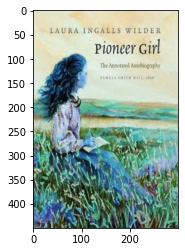

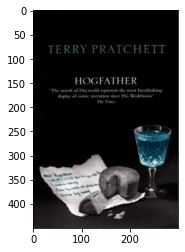

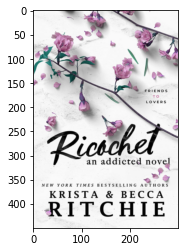

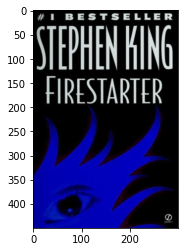

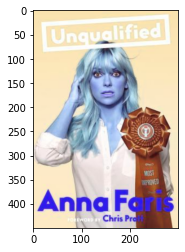

In [142]:
# Using the testing_data_loader to display 5 images from the dataset
for inp_data, tgt in testing_data_loader:
    for idx in range(5):
        plt.imshow(inp_data[idx].permute(1,2,0))
        plt.show()
    break

In [143]:
# Defining function to train the model

def myTrainFun(model, opt, crit,  train_set_len, val_set_len, num_epoch = 25):
    mystart = time.time()
    
    # Initializing the accuracy and epoch
    myaccuracy = 0.0
    myepoch = 0
    
    mymodel = copy.deepcopy(model.state_dict())
    
    for curr_epoch in range(1,num_epoch+1):
        epoch_start_time = time.time()
        lossTotal = 0.0
        correctCount = 0
        print("Epoch ",curr_epoch," out of ", num_epoch)
        
        model.train()
        
        for inp_data, tgt in training_data_loader:
            
            opt.zero_grad()
            
            with torch.set_grad_enabled(True):
                myout = model(inp_data)
                x, pred = torch.max(myout, 1)
                curr_loss = crit (myout, tgt)
                
                curr_loss.backward()
                opt.step()
                
            lossTotal = lossTotal + curr_loss.item() * inp_data.size(0)
            correctCount =  correctCount + torch.sum(pred == tgt.data)
            
        curr_accuracy_epoch = correctCount.double()/ train_set_len
        curr_loss_epoch = lossTotal / train_set_len
        
        print("The training Accuracy is {:.3f} and Loss is: {:.3f}".format(curr_accuracy_epoch, curr_loss_epoch))
        
        model.eval()
        
        correctCount_val = 0
        lossTotal_val = 0.0
        
        for inp_data, tgt in validation_data_loader:
            opt.zero_grad()
            
            with torch.set_grad_enabled(False):
                myout = model(inp_data)
                x, pred = torch.max(myout, 1)
                curr_loss = crit (myout, tgt)
                
            lossTotal_val = lossTotal_val + curr_loss.item() * inp_data.size(0)
            correctCount_val =  correctCount_val + torch.sum(pred == tgt.data)
            
        curr_accuracy_epoch = correctCount_val.double()/ val_set_len
        curr_loss_epoch = lossTotal_val / val_set_len
        print("The validation Accuracy is {:.3f} and Loss is: {:.3f}".format(curr_accuracy_epoch, curr_loss_epoch))
        
        if myaccuracy < curr_accuracy_epoch:
            myaccuracy = curr_accuracy_epoch
            myepoch = curr_epoch
            mymodel = copy.deepcopy(model.state_dict())
            
        
    end_time = time.time()
    print("Total training time ", end_time-mystart)
    
    print("\n\n")
    print("The highest validation accuracy is ", myaccuracy)
    
    # Loading the weights of the best performing model
    model.load_state_dict(mymodel)
    
    return model, myaccuracy, myepoch
            
            

In [157]:

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

In [325]:
# Defining function to test the model

def myTestFun(testing_data_loader, model):
    model.eval()
    mytotal=0
    y_val = []
    y_predict = []
    
    correctCounter = 0
    
    prob_y = np.empty((0,6))
    
    with torch.no_grad():
        for inp_data, tgt in testing_data_loader:
            myout = model(inp_data)
            x, pred = torch.max(myout.data, 1)
            
            mytotal = mytotal + tgt.size(0)
            correctCounter = correctCounter + (tgt == pred).sum().item()
            
            prob_y_2 = myout.cpu().clone()
            r_sum = torch.sum(prob_y_2, 1)
            r_sum = r_sum.unsqueeze(1)
            prob_y_2 = torch.div(prob_y_2, r_sum)
            
            y_predict.append(list(pred.cpu().numpy()))
            y_val.append(list(tgt.cpu().numpy()))
            
            prob_y = np.concatenate((prob_y, prob_y_2.cpu().numpy()),axis=0)
            
    
    y_predict = [j for i in y_predict for j in i]
    y_val = [j for i in y_val for j in i]
    
    # Displaying the evaluation metrics
    f1_score_val = f1_score(y_val, y_predict, average='micro')
    print("F1 Score", f1_score_val)
    print("\n")
    accuracy = (correctCounter/mytotal)*100
    print("Accuracy on testing data {:.4}".format(accuracy))
    print("\n")
    y_val_formatted = np.zeros((len(y_val),max(y_val)+1))
    y_val_formatted[np.arange(len(y_val)), y_val] =1
    roc_auc_val = roc_auc_score(y_val_formatted, prob_y, multi_class='ovr')
    
    print("ROC AUC ",roc_auc_val)
    
    return f1_score_val, accuracy, roc_auc_val
    
            

In [145]:
# Used to load the best performing model
def loadCP(file_path, model):
    myCP = torch.load(file_path)
    model.load_state_dict(myCP['modelStateDict'])
    myAccuracy = myCP['myAccuracy']
    myEpoch = myCP['myEpoch']
    print("Epoch: ", myEpoch)
    print("Accuracy: ",myAccuracy)
    return model, myEpoch, myAccuracy
    


# Used to save the best performing model
def saveCP(model,myAccuracy, myEpoch, modelName):
    currState = {'modelStateDict': model.state_dict(),
                    'myAccuracy': myAccuracy,
                    'myEpoch': myEpoch}
    formattedAccuracy = "{:.3f}".format(myAccuracy)
    torch.save(currState,"Checkpoint_"+modelName+"_"+formattedAccuracy+".pth.tar")
    return



### Genre Classification: Resnet-18

The first model we use is Resnet-18 which is a CNN that has a 72 layer architecture with 18 deep layers. The resnet18 model used is pretrained on millions of images from ImageNet. 
<br>
The Resnet-18 model obtained an accuracy of 43.73%

In [146]:
res18_model = resnet18(pretrained=True)


crit = nn.CrossEntropyLoss()
opt = optim.SGD(res18_model.parameters(), momentum=0.9, lr=1e-3)

# Here we freeze the layers
for x in res18_model.parameters():
    x.requires_grad = False
    
# Here we replace the last fully connected layer
features_count = res18_model.fc.in_features

res18_model_top = nn.Sequential(
nn.Linear(features_count,256),
nn.ReLU(inplace=True),
nn.Dropout(0.5),
nn.Linear(256,128),
nn.ReLU(inplace=True),
nn.Dropout(0.5),
nn.Linear(128, 6),
nn.ReLU(inplace=True)
)

res18_model.fc = res18_model_top
train_set_len = len(training_data)
val_set_len = len(validation_data)
res18_model, myAccuracy, myEpoch = myTrainFun(res18_model, opt, crit, train_set_len, val_set_len, num_epoch = 15)

modelName = "Resnet18"


Epoch  1  out of  15
The training Accuracy is 0.175 and Loss is: 1.794
The validation Accuracy is 0.191 and Loss is: 1.781
Epoch  2  out of  15
The training Accuracy is 0.189 and Loss is: 1.786
The validation Accuracy is 0.227 and Loss is: 1.770
Epoch  3  out of  15
The training Accuracy is 0.204 and Loss is: 1.777
The validation Accuracy is 0.253 and Loss is: 1.756
Epoch  4  out of  15
The training Accuracy is 0.222 and Loss is: 1.765
The validation Accuracy is 0.271 and Loss is: 1.740
Epoch  5  out of  15
The training Accuracy is 0.260 and Loss is: 1.746
The validation Accuracy is 0.294 and Loss is: 1.719
Epoch  6  out of  15
The training Accuracy is 0.263 and Loss is: 1.737
The validation Accuracy is 0.330 and Loss is: 1.701
Epoch  7  out of  15
The training Accuracy is 0.296 and Loss is: 1.719
The validation Accuracy is 0.381 and Loss is: 1.681
Epoch  8  out of  15
The training Accuracy is 0.310 and Loss is: 1.703
The validation Accuracy is 0.394 and Loss is: 1.667
Epoch  9  out of

NameError: name 'model' is not defined

Please note that the above model completed training successfully. There was a typo in the model name while saving the checkpoint after training completed. The model checkpoint was saved successfully using the correct model name in the following line of code

In [147]:
saveCP(res18_model,myAccuracy, myEpoch, modelName)

In [149]:
formattedAccuracy="{:.3f}".format(0.430)
CP_path = "Checkpoint_"+modelName+"_"+formattedAccuracy+".pth.tar"

In [150]:
res18_model_loaded, myEpoch, myAccuracy = loadCP(CP_path, res18_model)

Epoch:  13
Accuracy:  tensor(0.4298, dtype=torch.float64)


In [326]:
# Displaying various evaluation metrics

f1_score_val_r18, accuracy_r18, roc_auc_val_r18 = myTestFun(testing_data_loader, res18_model_loaded)

F1 Score 0.43729903536977494


Accuracy on testing data 43.73


ROC AUC  0.7273944311144728


### Genre Classification: Resnet-50

Resnet-50 is another variant of the Resnet architecture. It is 50 layers deep and uses bottleneck design for its building blocks. This refers to the 1x1 convolutions used which speeds up the training by reducing the number of matrix multiplications and parameters. A pretrained resnet-50 model was implemented in this project using PyTorch.

In [163]:
res50_model = resnet50(pretrained=True)


crit = nn.CrossEntropyLoss()
opt = optim.SGD(res50_model.parameters(), momentum=0.9, lr=1e-3)
# Here we freeze the layers
for x in res50_model.parameters():
    x.required_grad = False

# Here we replace the last fully connected layer
features_count = res50_model.fc.in_features

res50_model_top = nn.Sequential(
nn.Linear(features_count,256),
nn.ReLU(inplace=True),
nn.Dropout(0.5),
nn.Linear(256,128),
nn.ReLU(inplace=True),
nn.Dropout(0.5),
nn.Linear(128, 6),
nn.ReLU(inplace=True)
)

res50_model.fc = res50_model_top
train_set_len = len(training_data)
val_set_len = len(validation_data)
res50_model, myAccuracy, myEpoch = myTrainFun(res50_model, opt, crit, train_set_len, val_set_len, num_epoch = 15)

modelName = "Resnet50"

c:\users\preet\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\users\preet\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\preet/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Epoch  1  out of  15
The training Accuracy is 0.172 and Loss is: 1.793
The validation Accuracy is 0.159 and Loss is: 1.793
Epoch  2  out of  15
The training Accuracy is 0.163 and Loss is: 1.793
The validation Accuracy is 0.152 and Loss is: 1.793
Epoch  3  out of  15
The training Accuracy is 0.162 and Loss is: 1.793
The validation Accuracy is 0.152 and Loss is: 1.793
Epoch  4  out of  15
The training Accuracy is 0.169 and Loss is: 1.792
The validation Accuracy is 0.155 and Loss is: 1.793
Epoch  5  out of  15
The training Accuracy is 0.169 and Loss is: 1.793
The validation Accuracy is 0.153 and Loss is: 1.793
Epoch  6  out of  15
The training Accuracy is 0.162 and Loss is: 1.793
The validation Accuracy is 0.158 and Loss is: 1.793
Epoch  7  out of  15
The training Accuracy is 0.173 and Loss is: 1.792
The validation Accuracy is 0.164 and Loss is: 1.793
Epoch  8  out of  15
The training Accuracy is 0.180 and Loss is: 1.792
The validation Accuracy is 0.152 and Loss is: 1.793
Epoch  9  out of

In [165]:
saveCP(res50_model,myAccuracy, myEpoch, modelName)

In [168]:
formattedAccuracy="{:.3f}".format(0.164)
CP_path = "Checkpoint_"+modelName+"_"+formattedAccuracy+".pth.tar"

In [169]:
res50_model_loaded, myEpoch, myAccuracy = loadCP(CP_path, res50_model)

Epoch:  7
Accuracy:  tensor(0.1635, dtype=torch.float64)


In [329]:
# Displaying various evaluation metrics
f1_score_val_r50, accuracy_r50, roc_auc_val_r50 = myTestFun(testing_data_loader, res50_model_loaded)

F1 Score 0.1945337620578778


Accuracy on testing data 19.45


ROC AUC  0.49028675159725404


### Genre Classification: VGG-16

VGG-16 is a state-of-the-art neural network which has achieved excellent results for image classification problems through transfer learning. It is a CNN that is pretrained on a subset of ImageNet. VGG-16 is 16 layers deep with 5 MaxPooling layers, 3 Dense layers, and 13 Convolution layers. Although the number of layers sums up to 21, there are only 16 weight layers.

In [175]:
vgg16_model = vgg16(pretrained=True)


crit = nn.CrossEntropyLoss()
opt = optim.SGD(vgg16_model.parameters(), momentum=0.9, lr=1e-3)
# Here we freeze the layers
for x in vgg16_model.parameters():
    x.required_grad = False
    
features_count = 25088

In [176]:
vgg16_model_top = nn.Sequential(
nn.Linear(25088,256),
nn.ReLU(inplace=True),
nn.Dropout(0.5),
nn.Linear(256,128),
nn.ReLU(inplace=True),
nn.Dropout(0.5),
nn.Linear(128, 6),
nn.ReLU(inplace=True)
)

vgg16_model.classifier = vgg16_model_top
train_set_len = len(training_data)
val_set_len = len(validation_data)
vgg16_model, myAccuracy, myEpoch = myTrainFun(vgg16_model, opt, crit, train_set_len, val_set_len, num_epoch = 15)

modelName = "VGG16"

Epoch  1  out of  15
The training Accuracy is 0.185 and Loss is: 1.791
The validation Accuracy is 0.217 and Loss is: 1.787
Epoch  2  out of  15
The training Accuracy is 0.205 and Loss is: 1.776
The validation Accuracy is 0.204 and Loss is: 1.733
Epoch  3  out of  15
The training Accuracy is 0.242 and Loss is: 1.731
The validation Accuracy is 0.284 and Loss is: 1.679
Epoch  4  out of  15
The training Accuracy is 0.265 and Loss is: 1.706
The validation Accuracy is 0.334 and Loss is: 1.646
Epoch  5  out of  15
The training Accuracy is 0.284 and Loss is: 1.683
The validation Accuracy is 0.336 and Loss is: 1.653
Epoch  6  out of  15
The training Accuracy is 0.294 and Loss is: 1.669
The validation Accuracy is 0.356 and Loss is: 1.622
Epoch  7  out of  15
The training Accuracy is 0.300 and Loss is: 1.658
The validation Accuracy is 0.342 and Loss is: 1.617
Epoch  8  out of  15
The training Accuracy is 0.318 and Loss is: 1.637
The validation Accuracy is 0.385 and Loss is: 1.558
Epoch  9  out of

In [177]:
saveCP(vgg16_model,myAccuracy, myEpoch, modelName)

In [178]:
formattedAccuracy="{:.3f}".format(0.456)
CP_path = "Checkpoint_"+modelName+"_"+formattedAccuracy+".pth.tar"

In [179]:
vgg16_model_loaded, myEpoch, myAccuracy = loadCP(CP_path, vgg16_model)

Epoch:  15
Accuracy:  tensor(0.4559, dtype=torch.float64)


In [327]:
# Displaying various evaluation metrics
f1_score_val_vgg16, accuracy_vgg16, roc_auc_val_vgg16 = myTestFun(testing_data_loader, vgg16_model_loaded)

F1 Score 0.454983922829582


Accuracy on testing data 45.5


ROC AUC  0.7778425292333138


### Image Captioning

The image captioning model is implemented in the second jupyter notebook